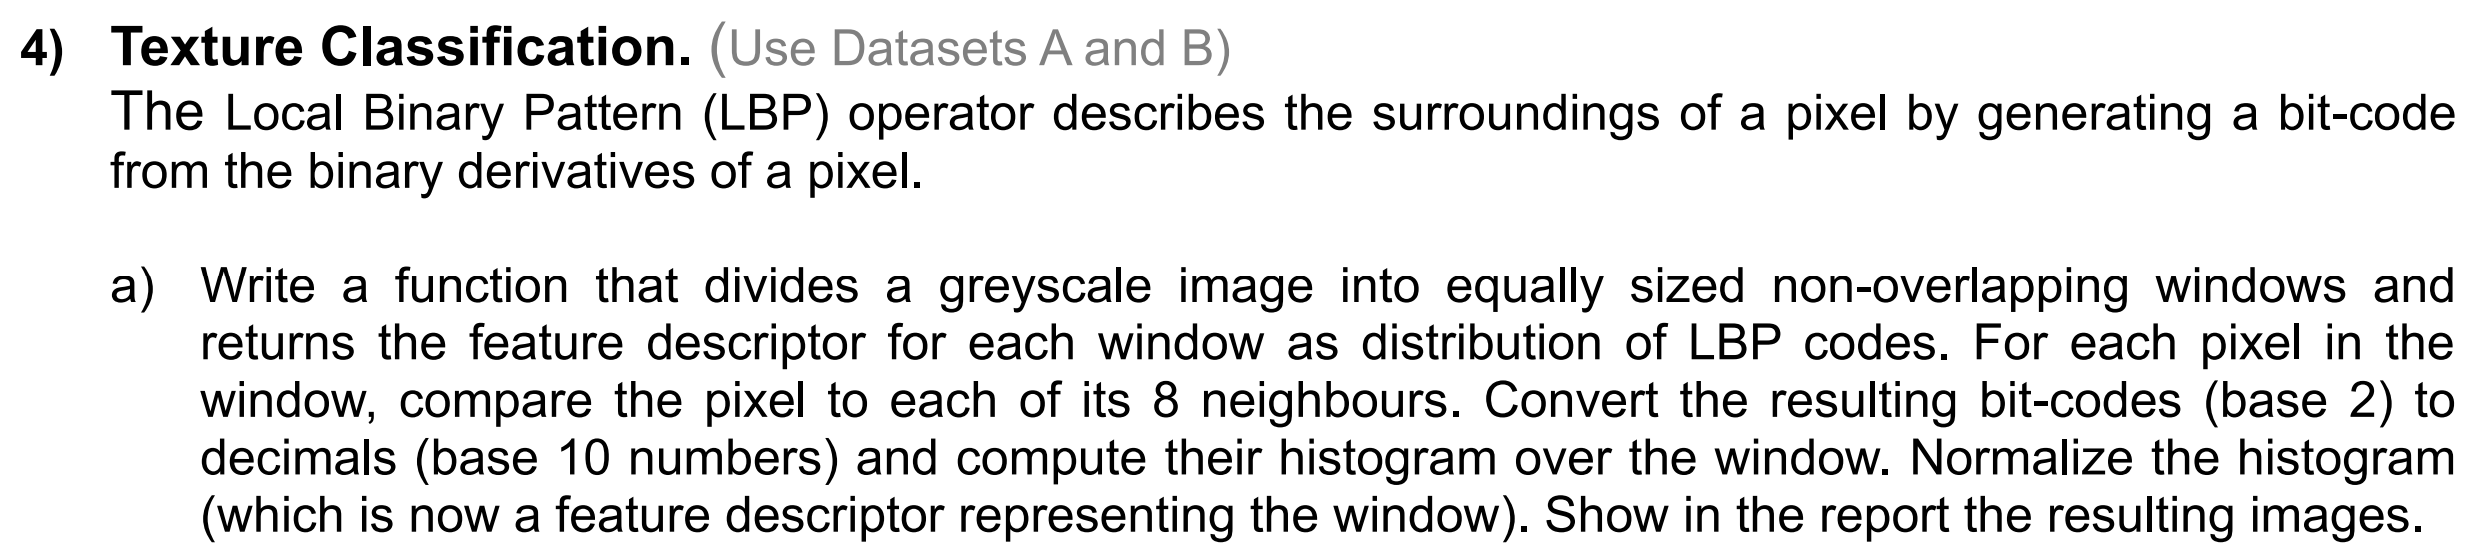

In [53]:
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

In [54]:
import cv2

# Load an RGB image
image = cv2.imread("Dataset//DatasetA//face-1.jpg")

# Convert the RGB image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.array(gray_image)
# Save or display the grayscale image
# cv2.imwrite('grayscale_image.jpg', gray_image)
# cv2.imshow('Grayscale Image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [55]:
image.max()

255

In [56]:
def LBP(image, window_size):
    output = np.zeros(image.shape)
    normalised_output = np.zeros(image.shape)
    for i in range(0, image.shape[0],window_size):
        for j in range(0,image.shape[1],window_size):
            
            #add padding to the window
            window = np.zeros((window_size+2, window_size+2))
            window[1:window.shape[0]-1, 1:window.shape[1]-1] = image[i:i + window_size, j:j + window_size]
            window_decimal_numbers = calculate_decimal_number(window)
            max_value = np.max(window_decimal_numbers)
            normalised_output [i:i + window_size, j:j + window_size] = (window_decimal_numbers/max_value)
            output [i:i + window_size, j:j + window_size] = window_decimal_numbers
            
            create_histogram(window_decimal_numbers)

    plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

    # First subplot for the first image (on the left)
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    plt.imshow(output, cmap='gray')
    plt.title("Not normalised")

    # Second subplot for the second image (on the right)
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    plt.imshow(normalised_output, cmap='gray')
    plt.title("Normalised")

    # Show the combined plot
    plt.show()

In [57]:
def create_histogram(decimal_numbers):
    
    max_value = decimal_numbers.max()
    
    histogram = np.zeros((1,max_value+1))
    
    for i in range(decimal_numbers.shape[0]):
        for j in range(decimal_numbers.shape[1]):
            
            histogram[0,decimal_numbers[i,j]] += 1
            
    normalised_histogram = histogram/max_value        
    plt.figure(figsize=(12, 4))
    plt.subplot(121)  # 1 row, 2 columns, plot 1
    plt.plot(histogram[0], color = 'gray')
    plt.subplot(122)
    plt.plot(normalised_histogram[0], color = 'green')
    plt.show()
    
    #Q1 is histogram frequency of color occurance here?
    #Q2 is normalised histogram on max frequency?

In [58]:
def calculate_decimal_number(window):
    binary_numbers = []
    for i in range(1, window.shape[0]-1):
        for j in range(1, window.shape[1]-1):
            binary_number = ""
            center = window[i,j]
            neighbours =  [window[i-1, j-1],window[i-1, j],window[i-1, j+1],
                           window[i, j-1],window[i, j+1],
                           window[i+1, j-1],window[i+1, j],window[i+1, j+1]]
            for neighbour in neighbours:
                if neighbour > center:
                    binary_number += "1"
                else:
                    binary_number += "0"
            binary_numbers.append(binary_number)
            
    decimal_numbers = [int(binary, 2) for binary in binary_numbers]
#     print("decimal numbers shape", len(decimal_numbers),window.shape[0], window.shape[1])
    np_array = np.array(decimal_numbers).reshape(window.shape[0]-2, window.shape[1]-2)
    return np_array
                

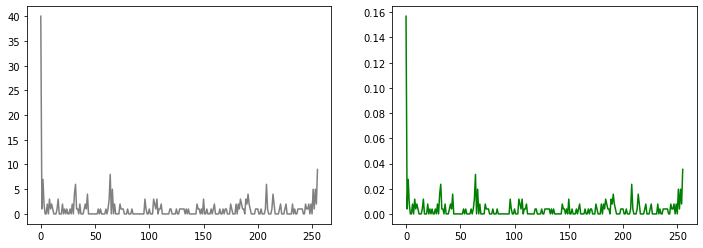

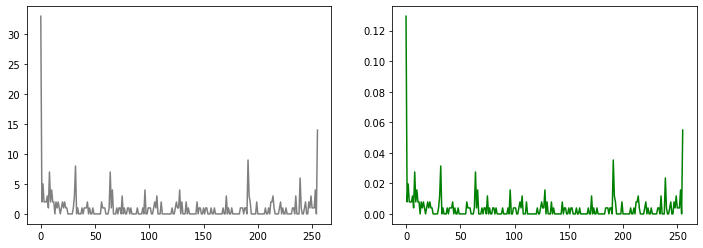

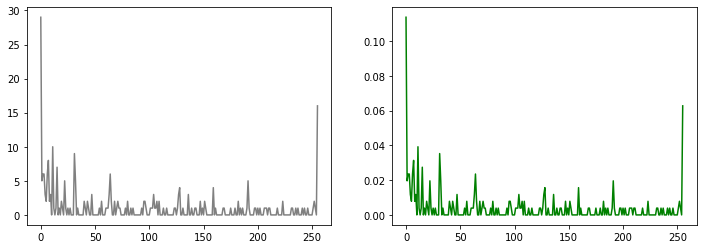

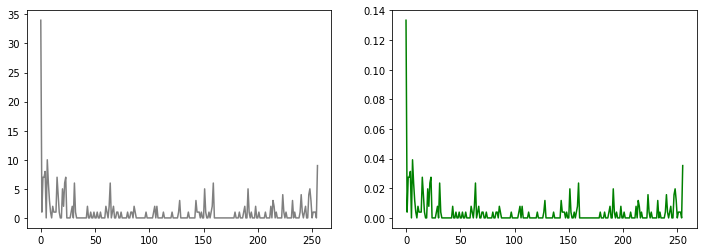

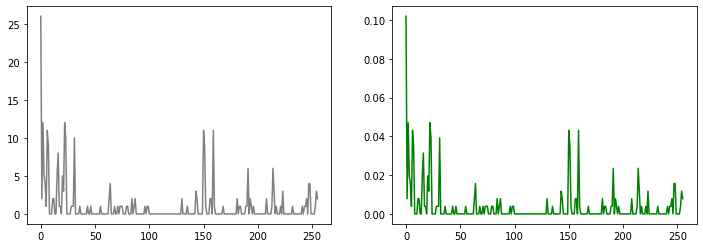

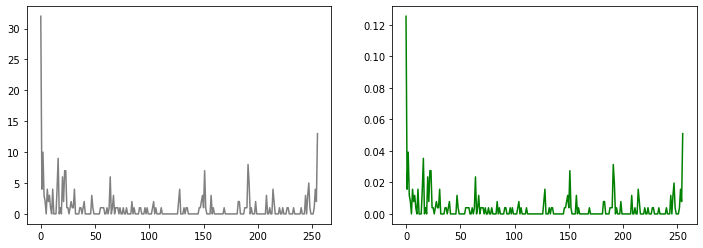

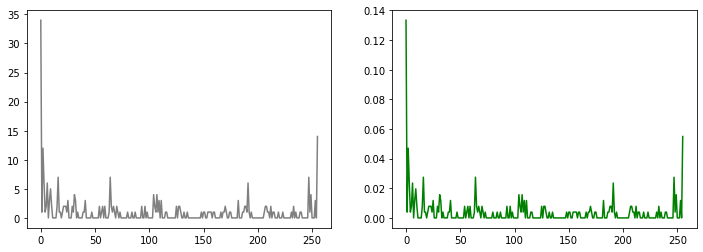

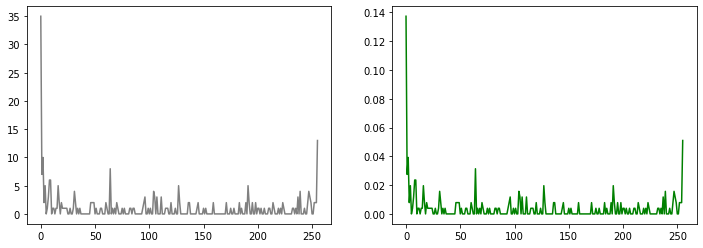

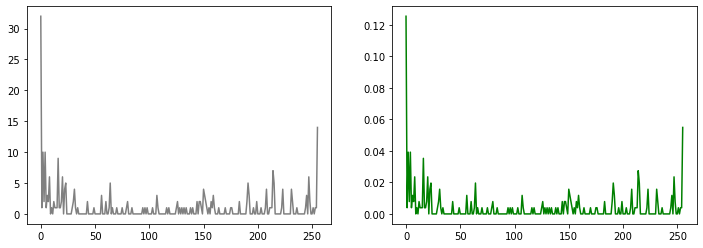

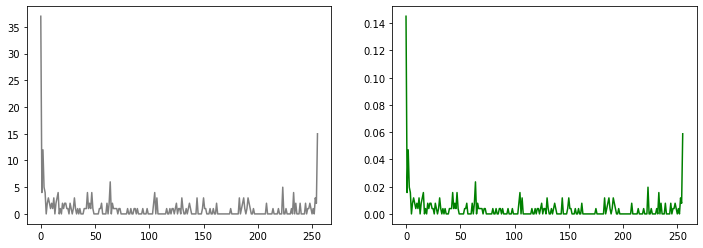

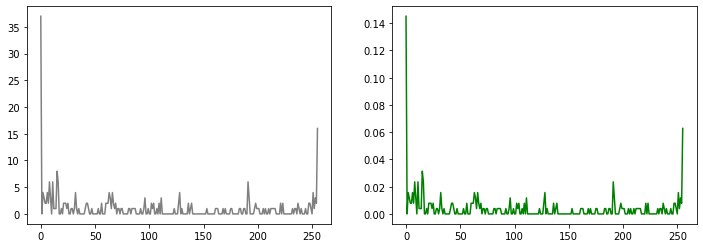

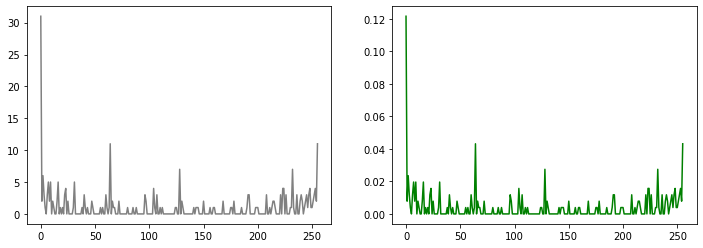

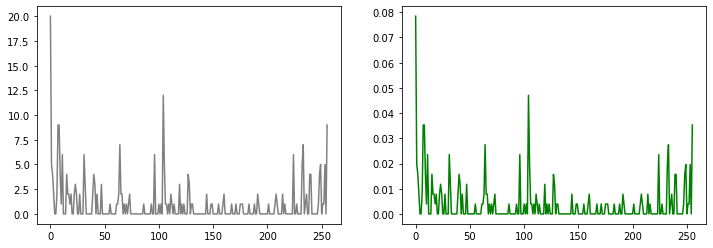

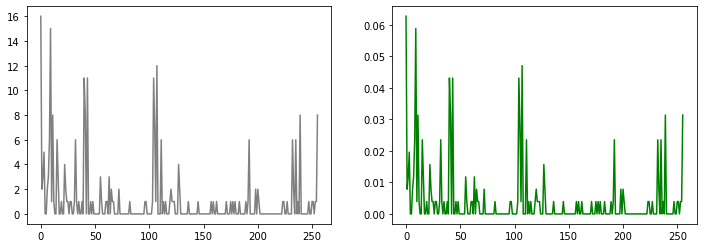

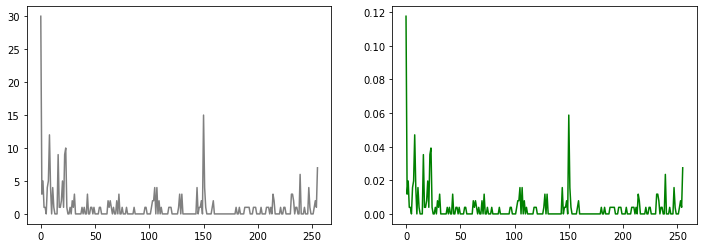

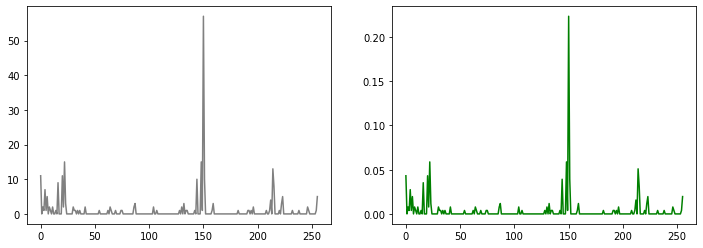

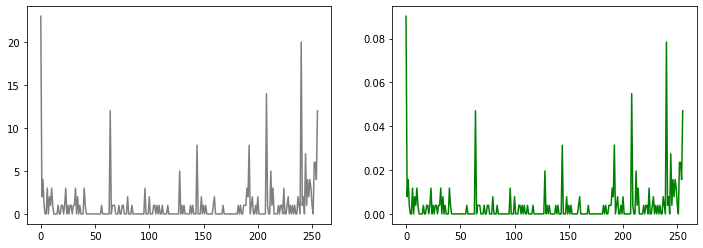

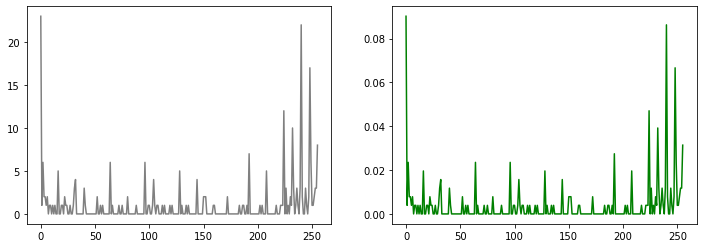

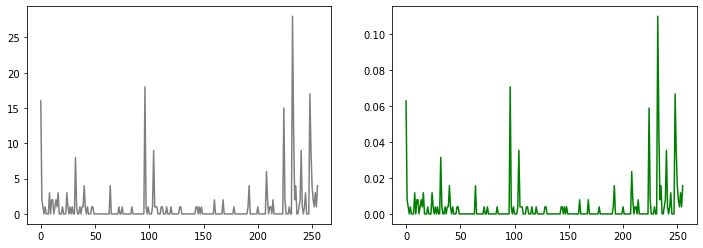

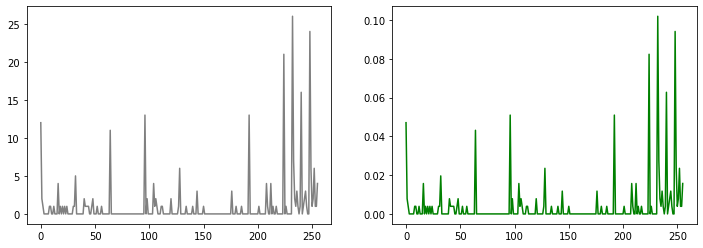

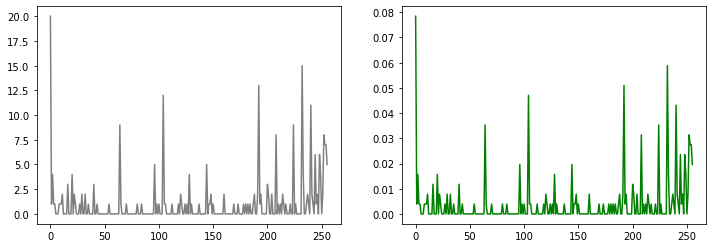

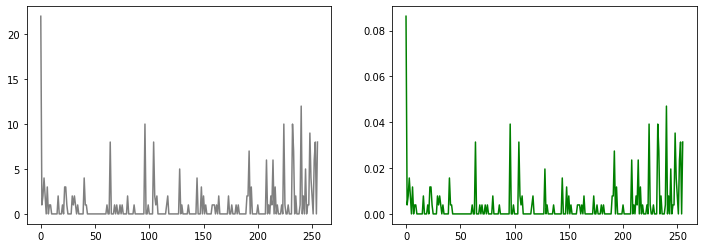

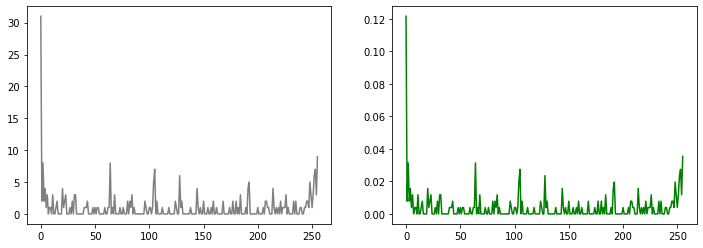

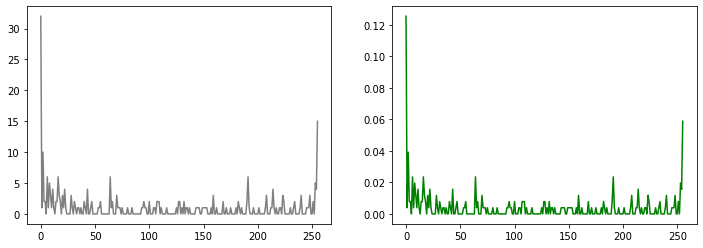

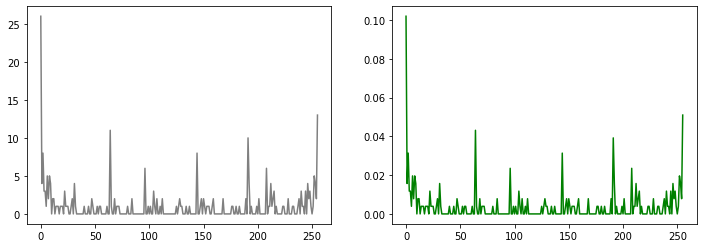

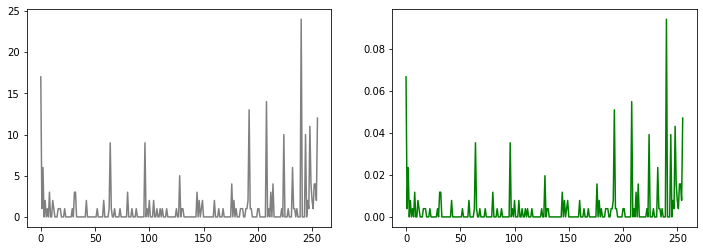

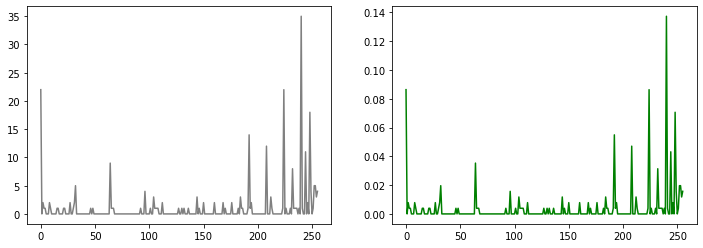

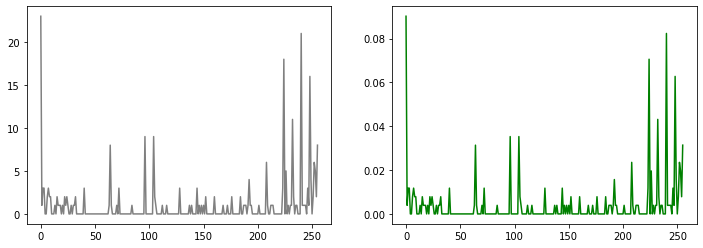

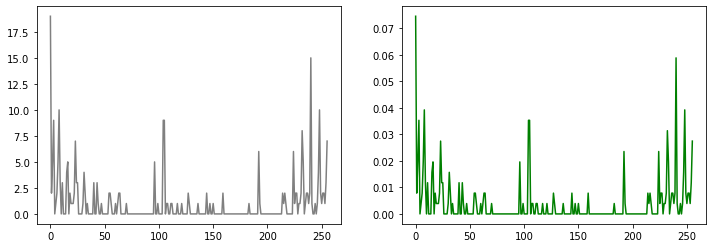

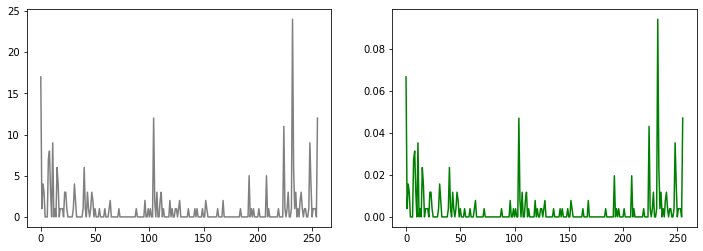

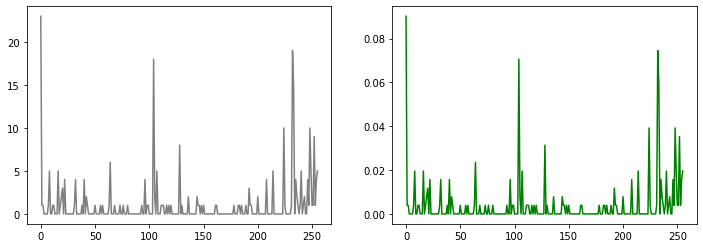

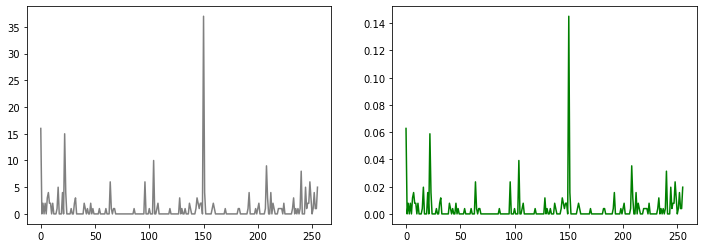

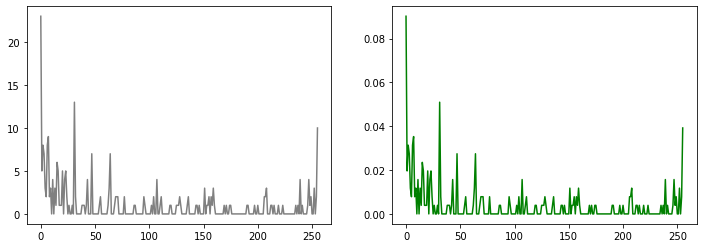

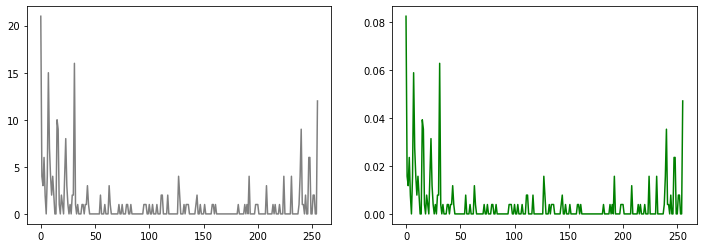

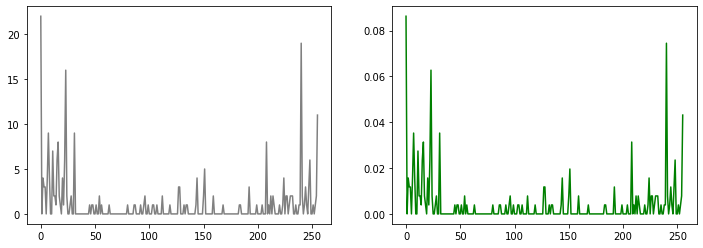

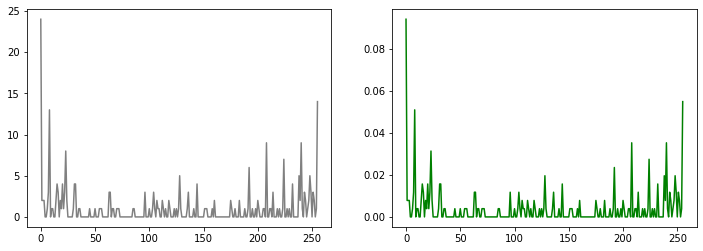

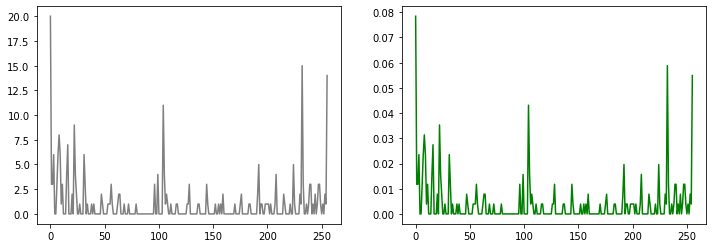

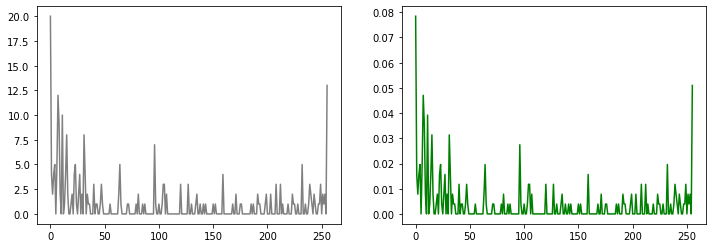

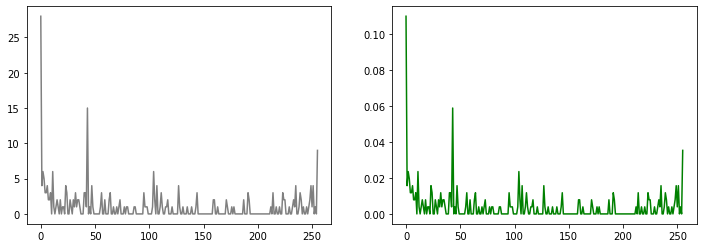

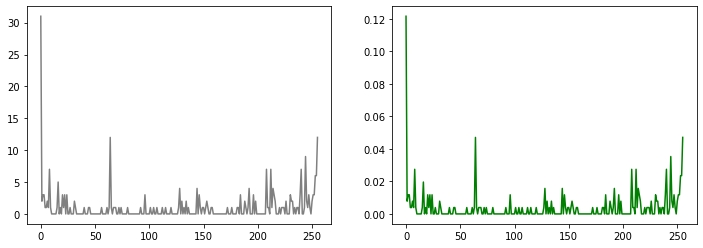

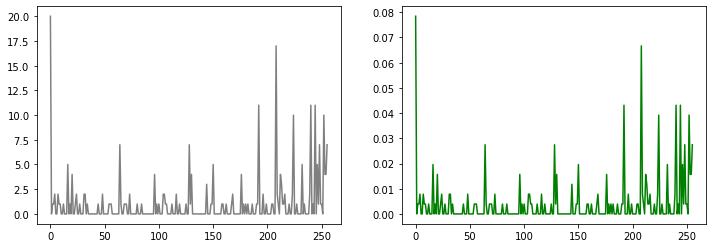

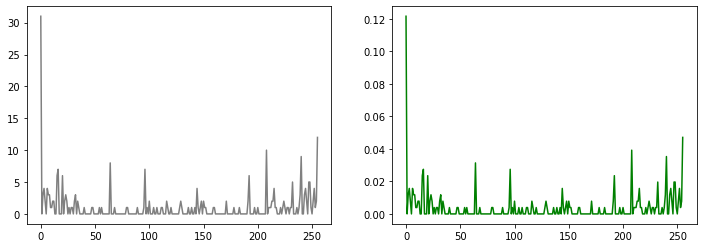

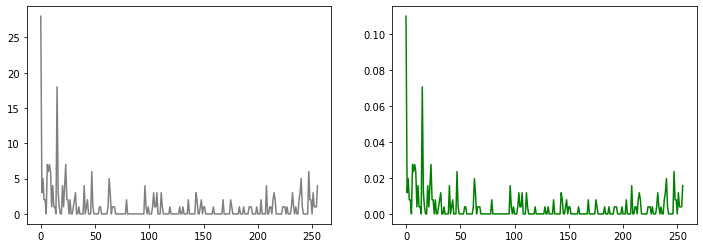

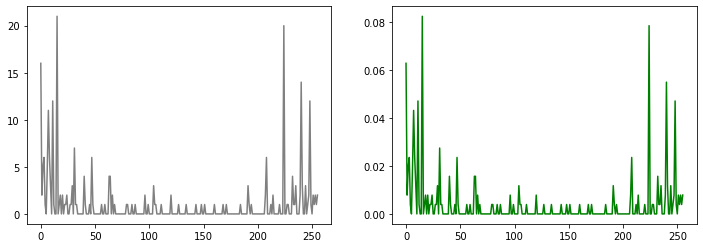

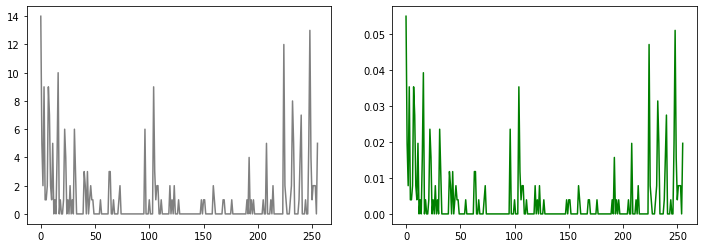

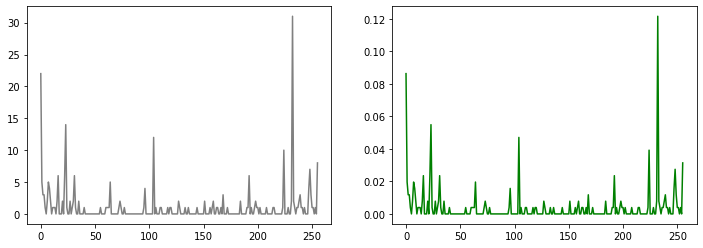

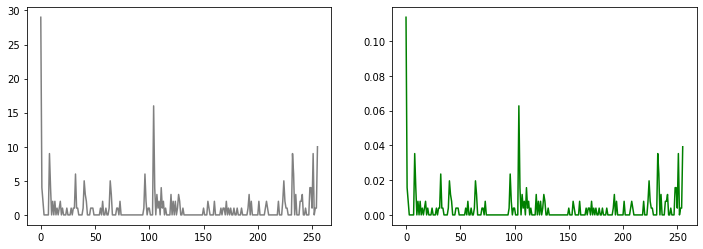

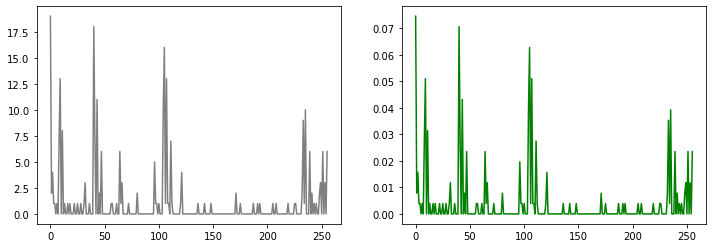

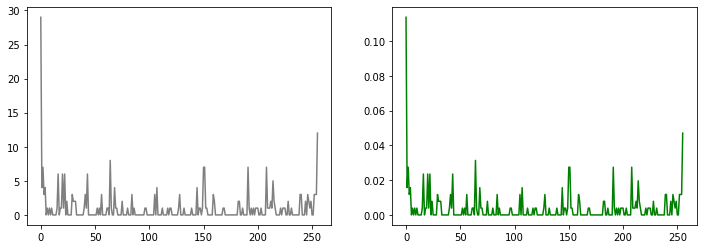

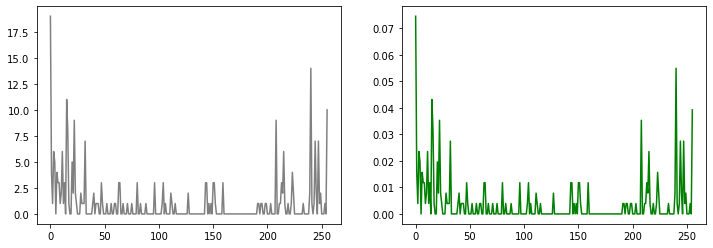

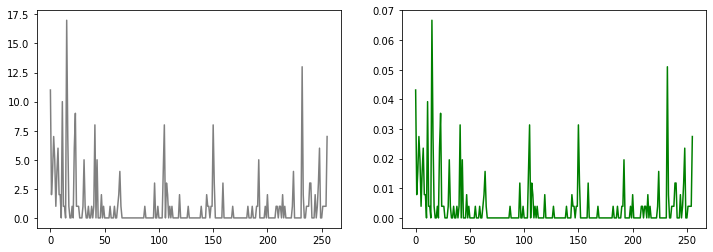

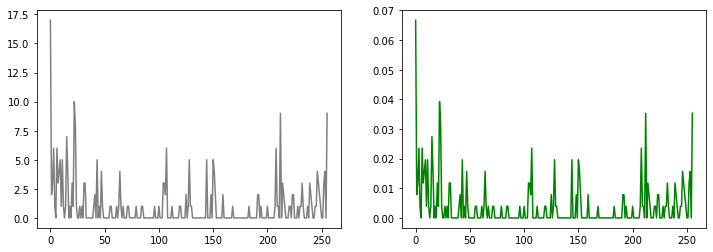

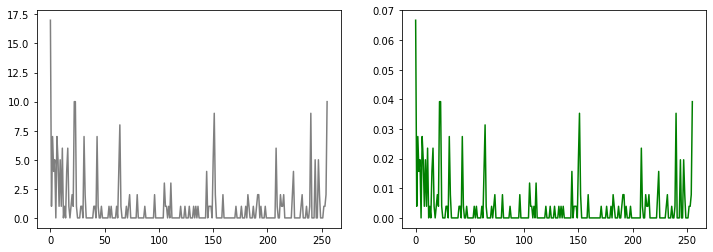

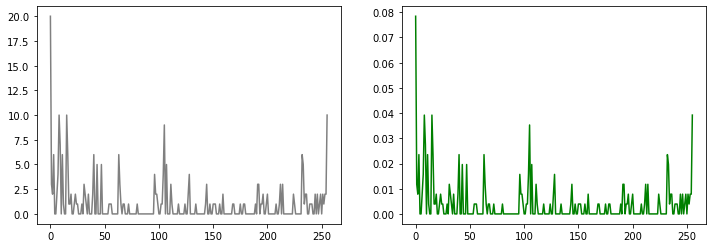

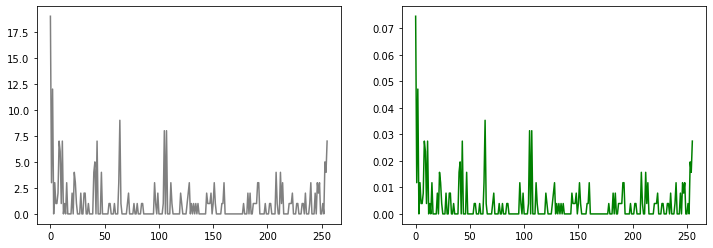

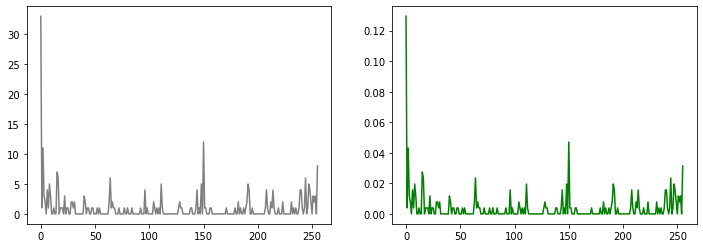

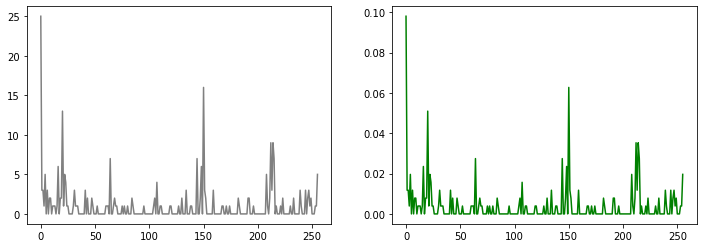

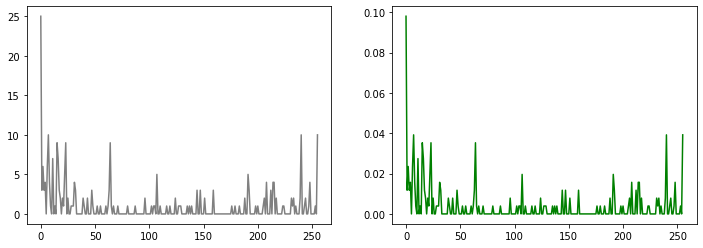

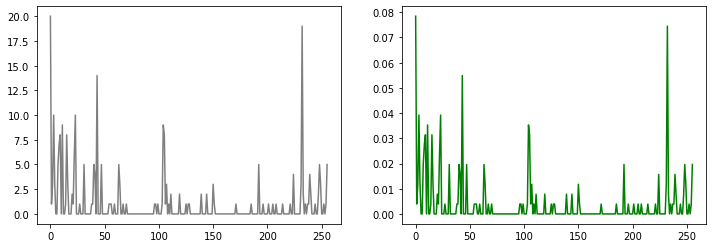

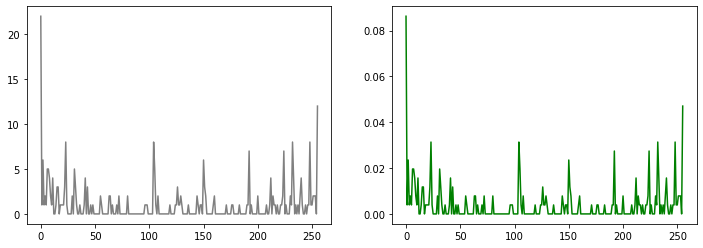

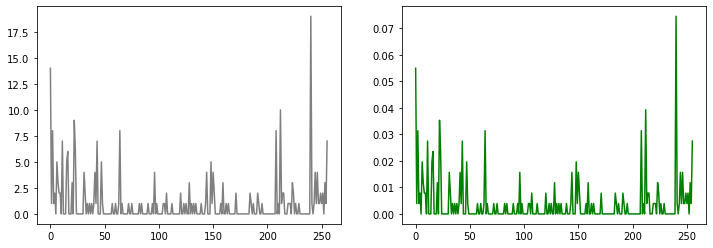

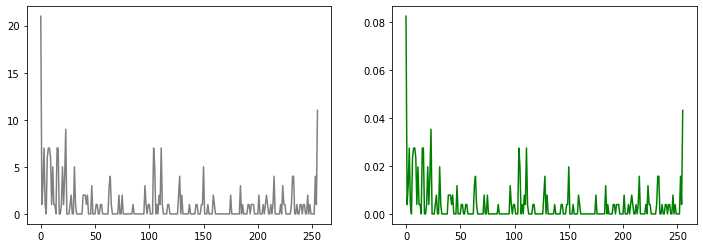

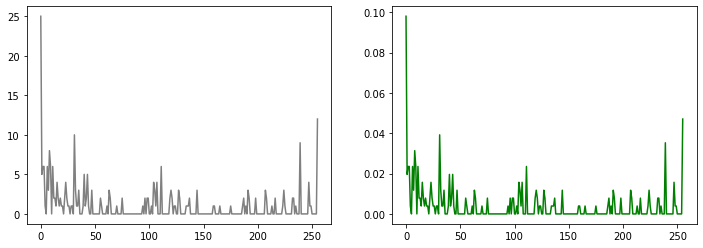

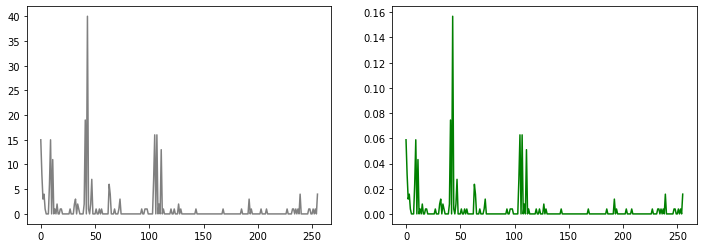

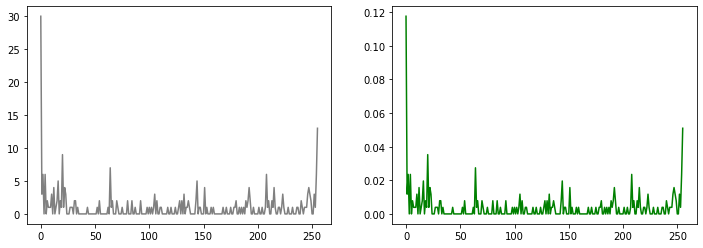

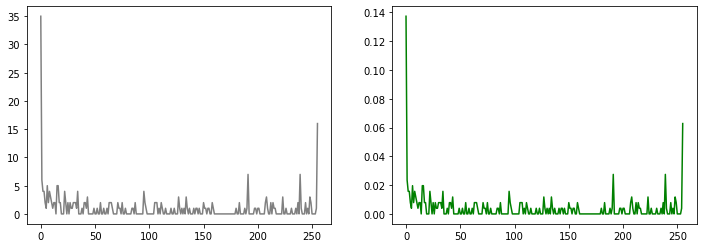

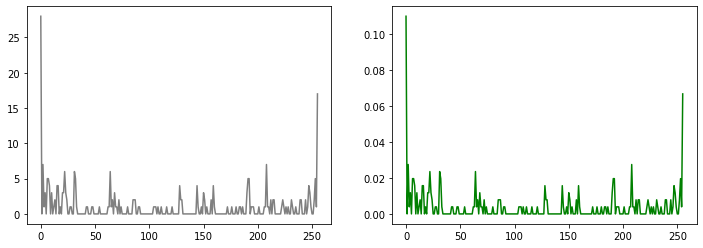

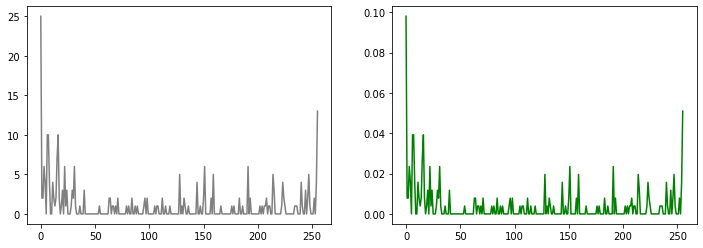

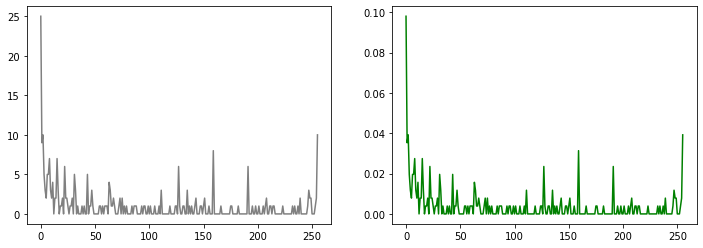

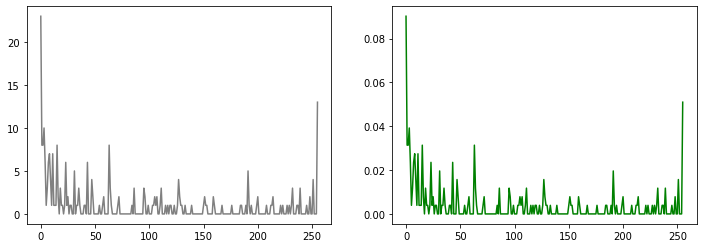

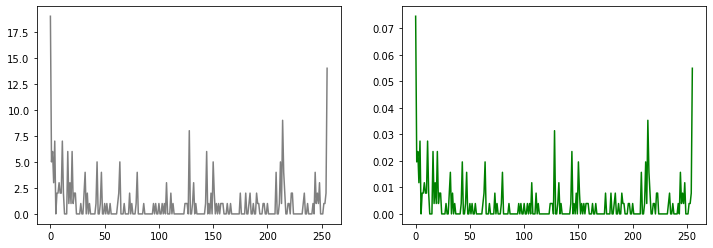

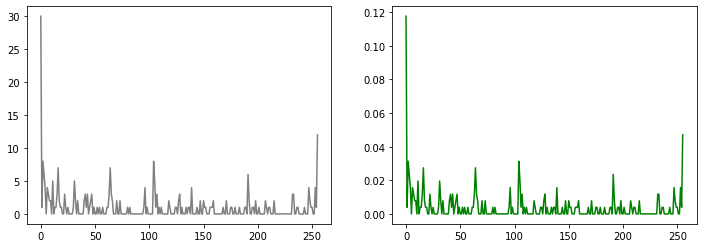

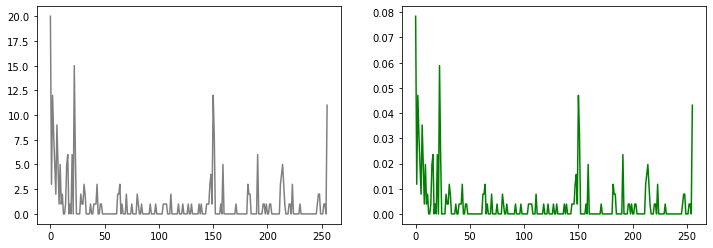

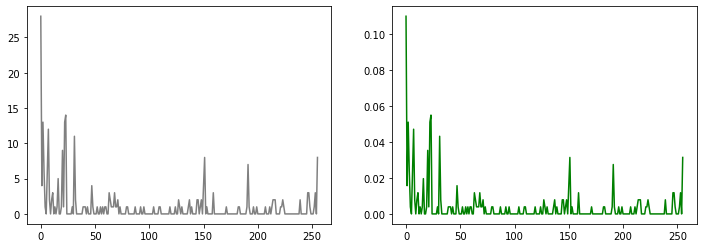

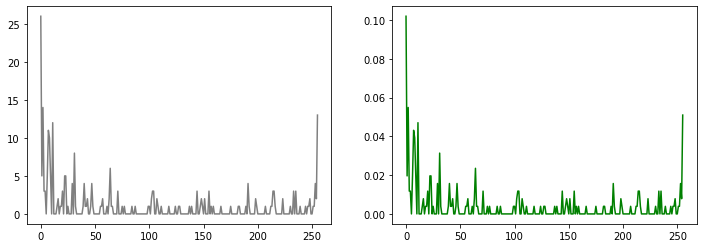

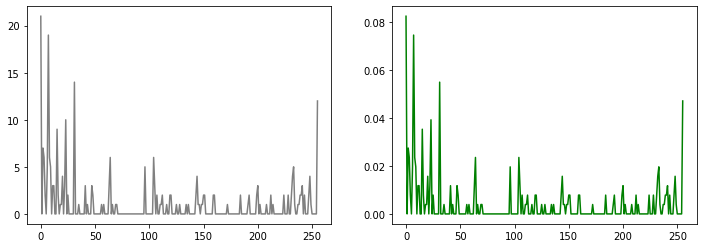

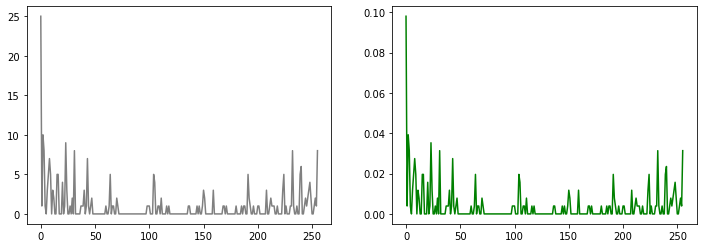

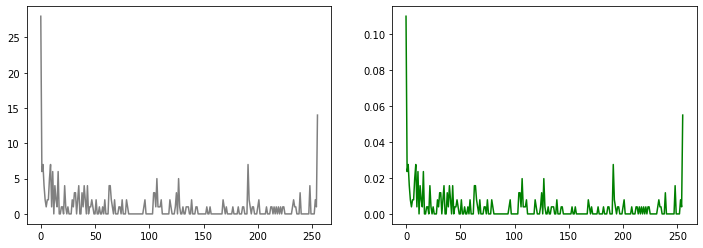

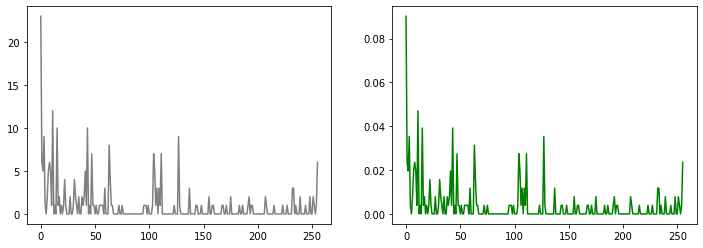

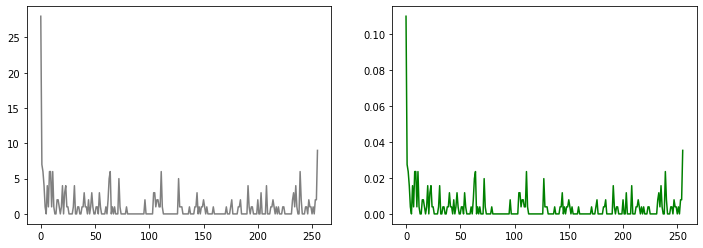

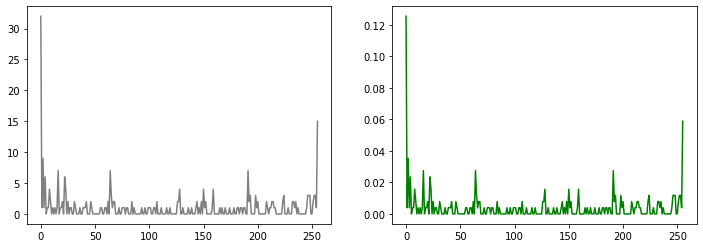

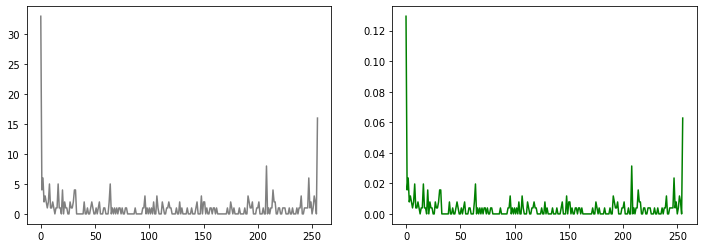

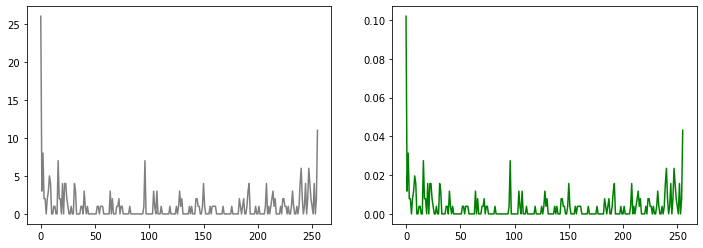

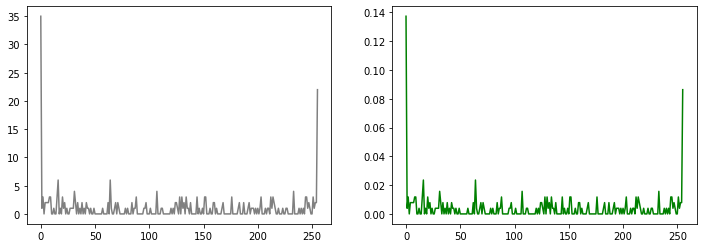

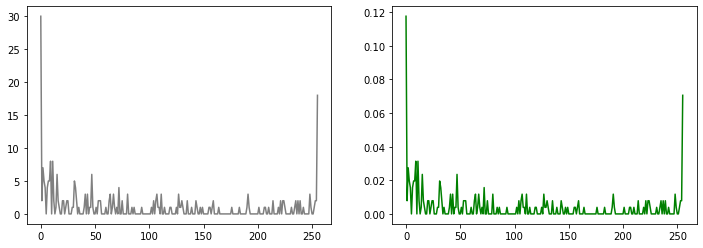

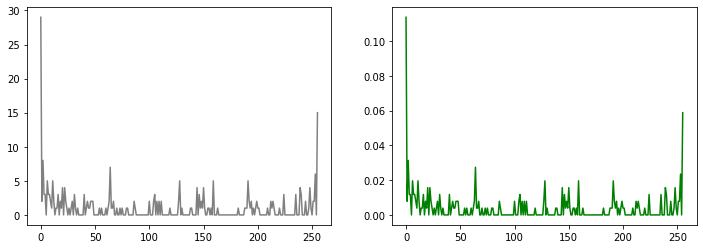

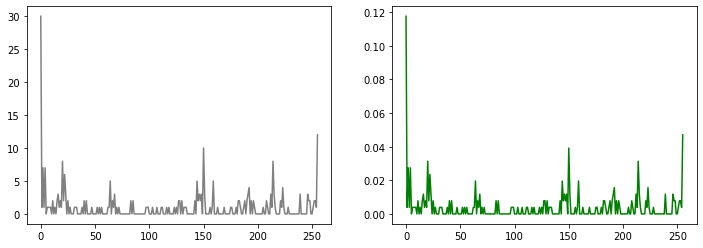

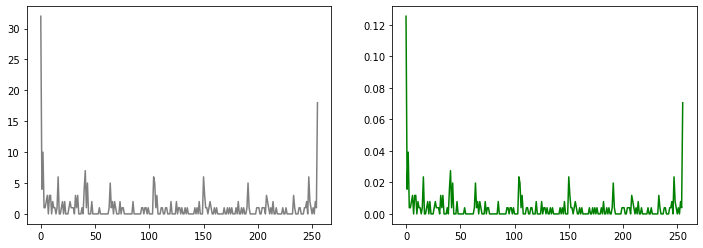

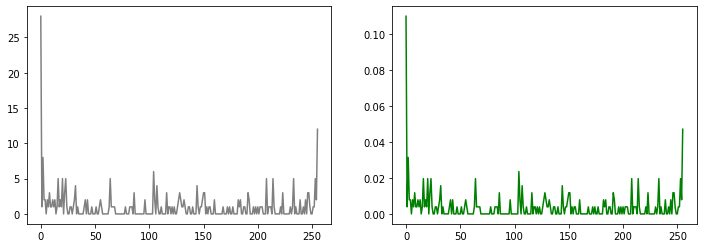

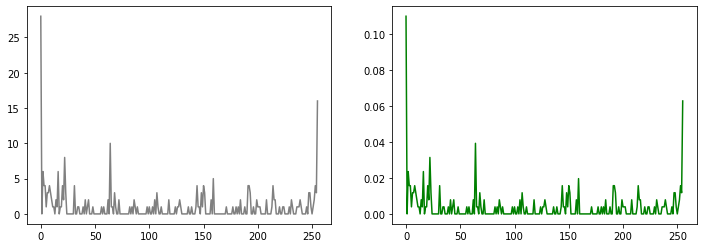

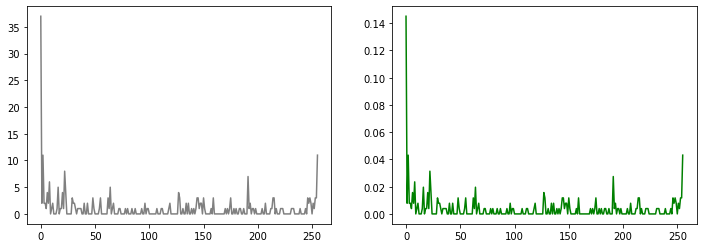

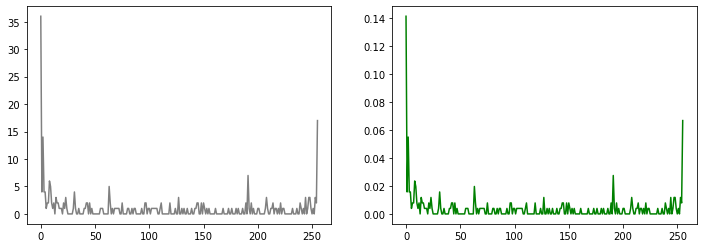

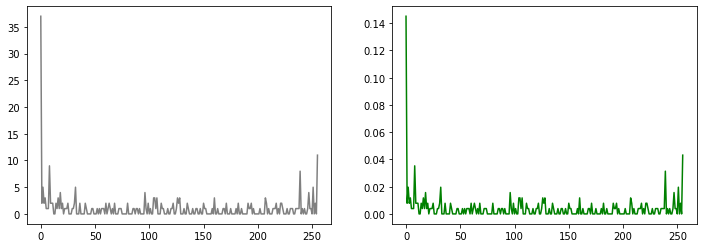

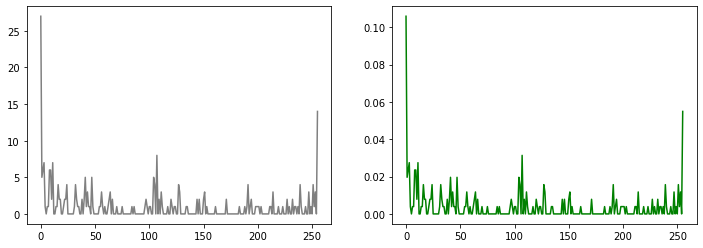

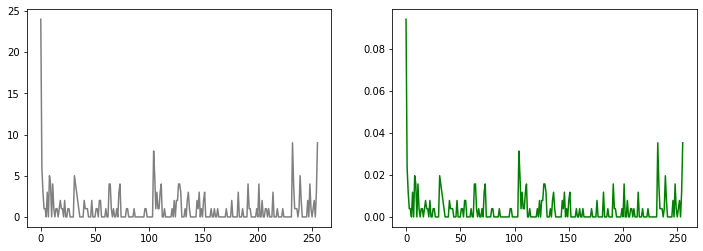

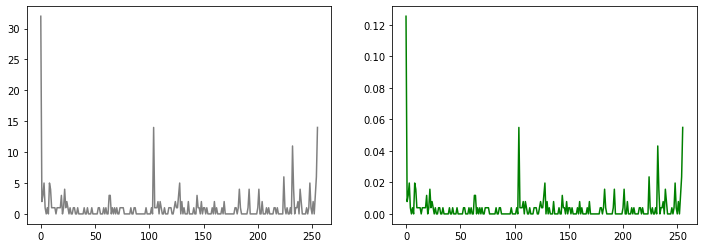

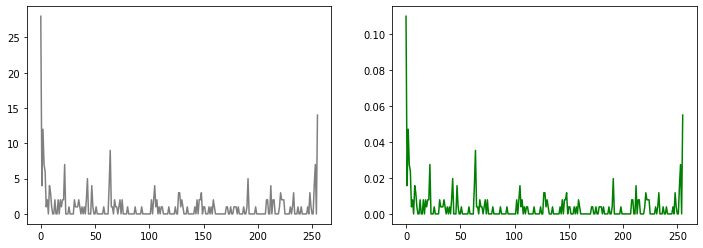

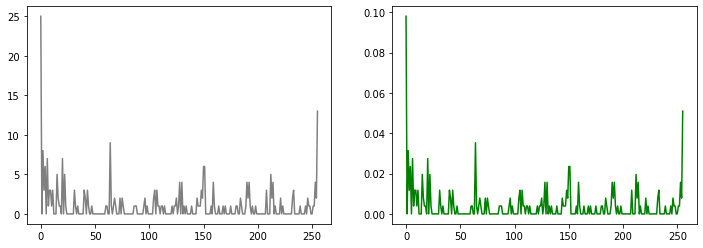

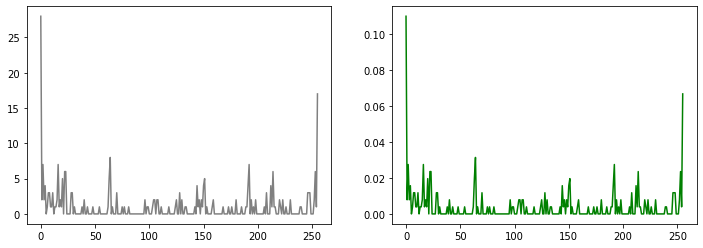

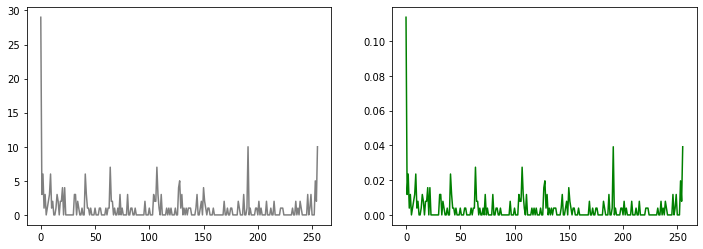

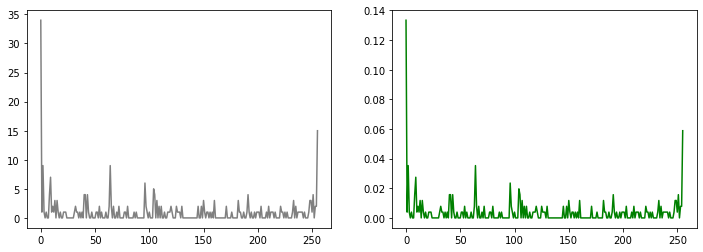

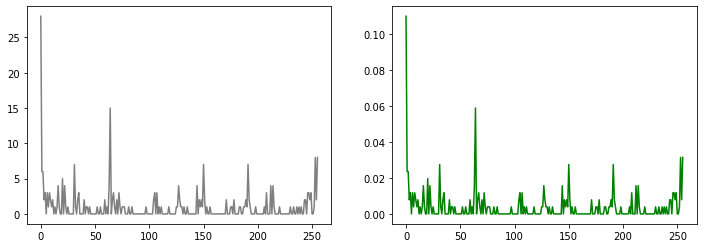

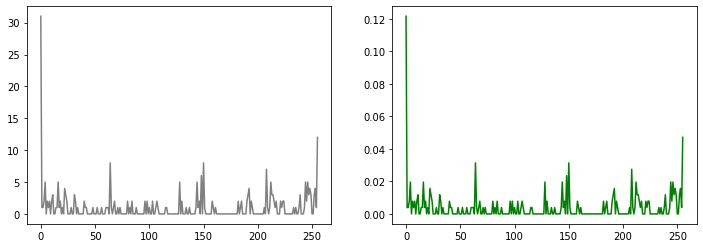

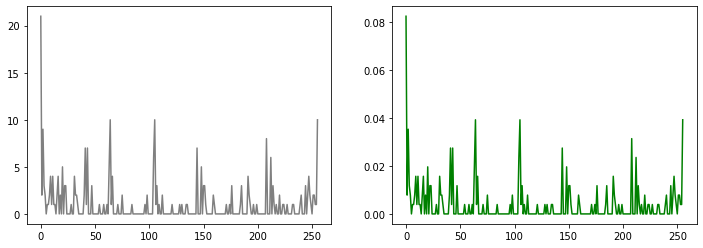

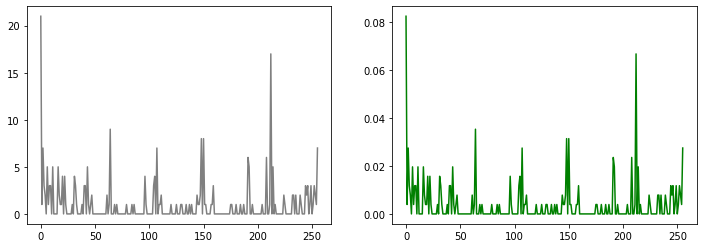

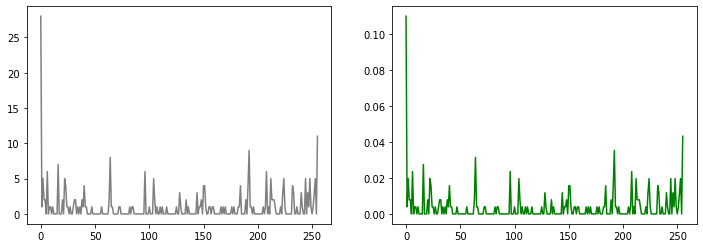

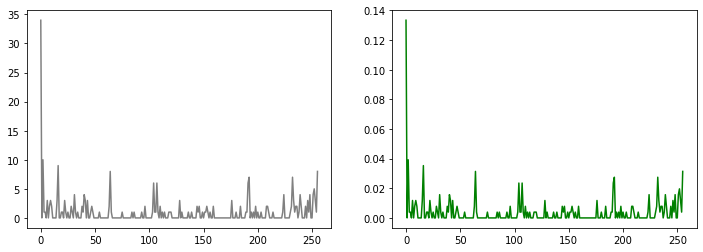

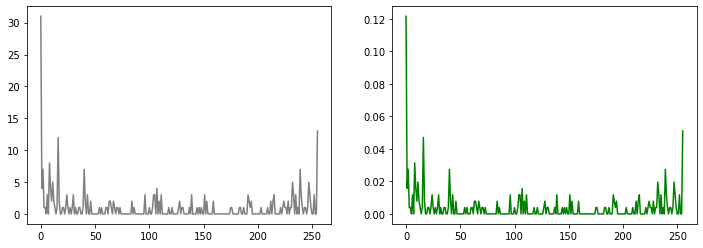

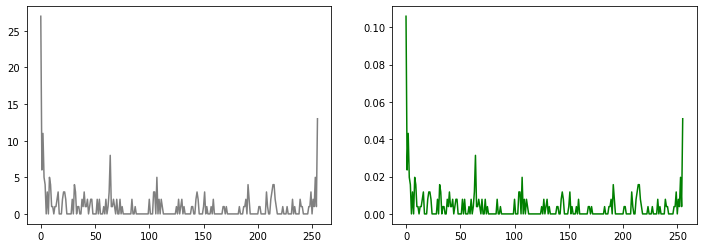

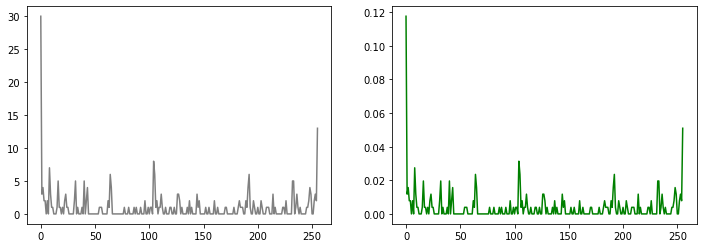

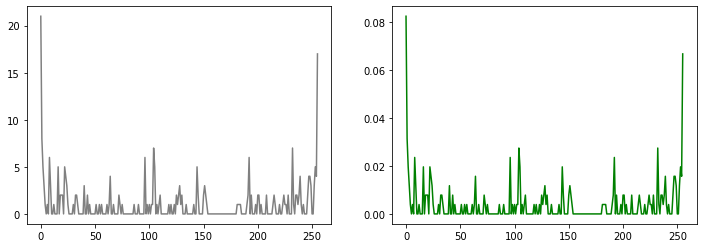

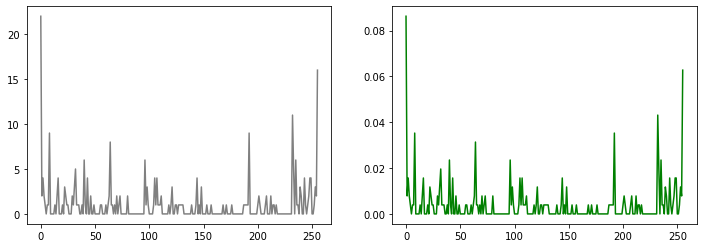

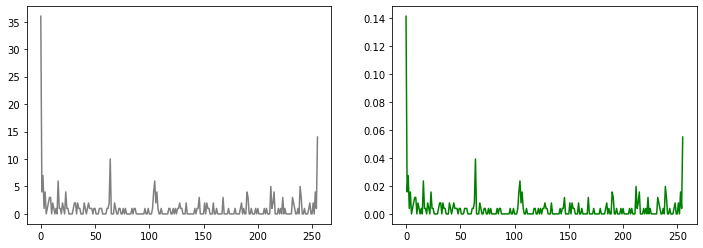

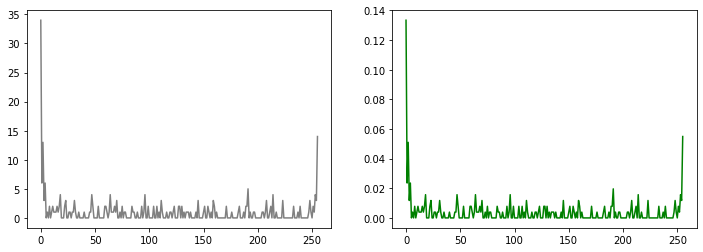

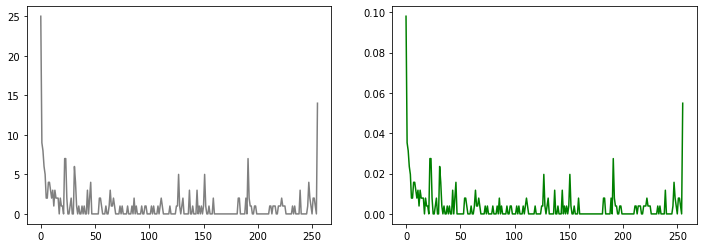

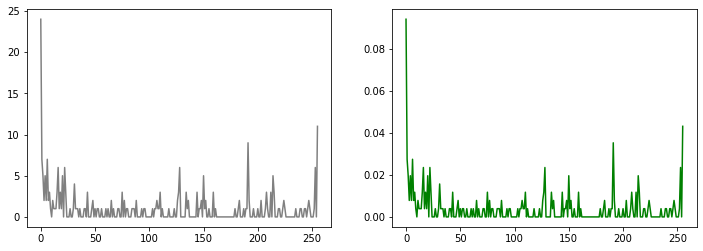

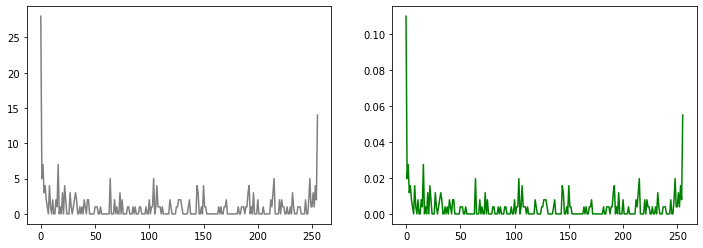

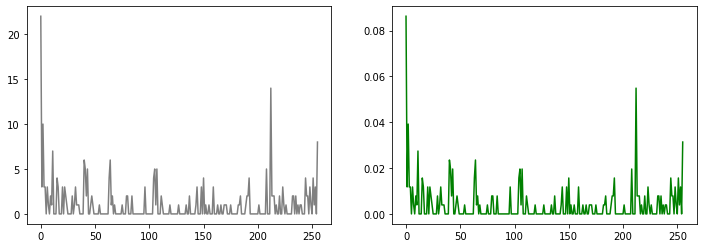

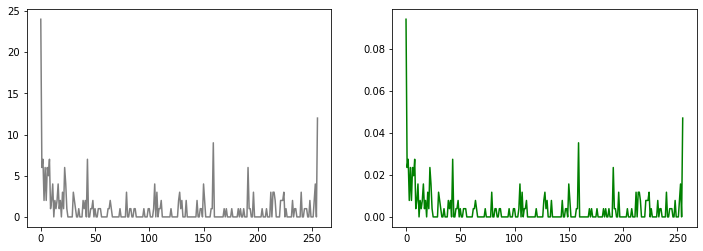

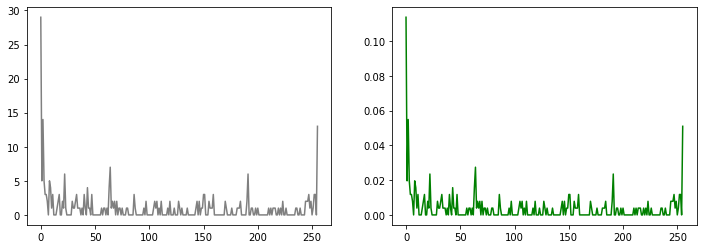

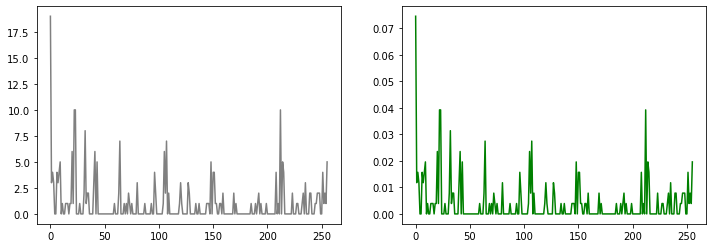

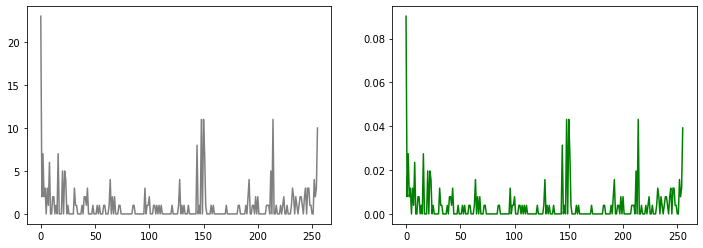

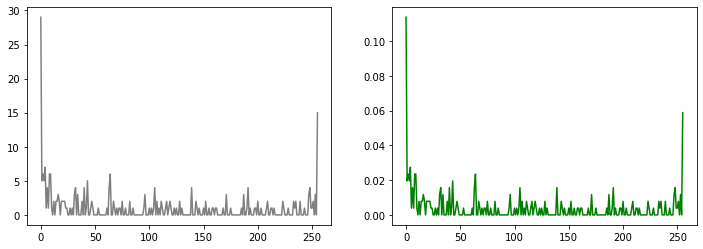

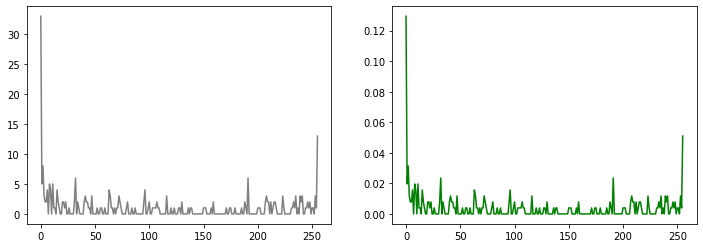

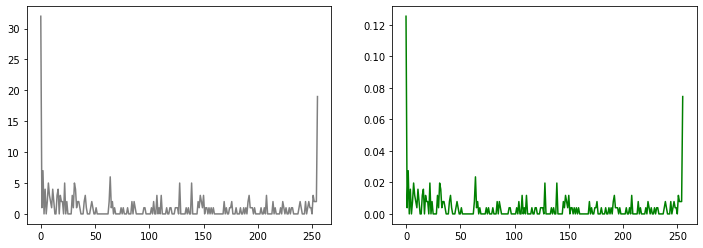

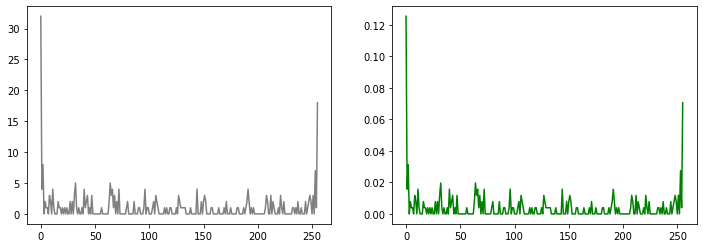

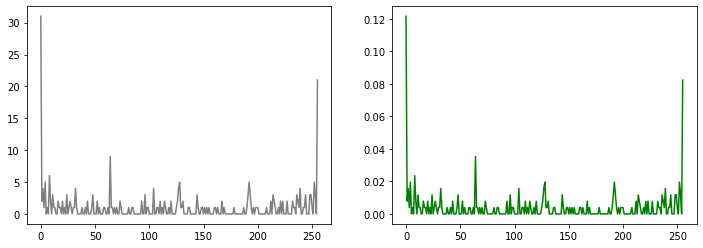

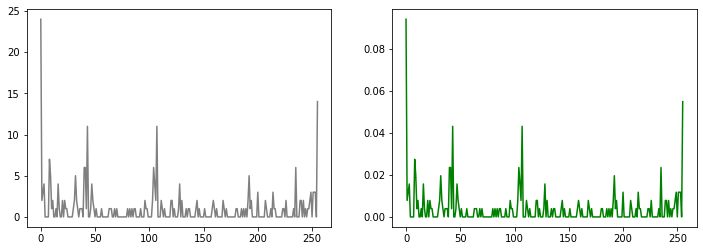

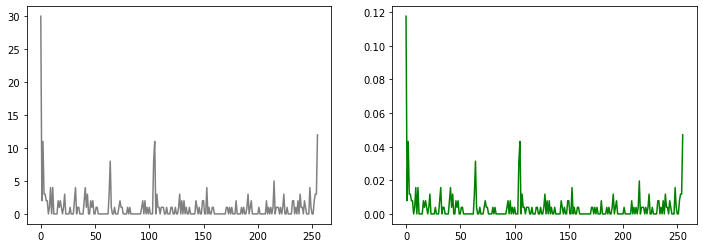

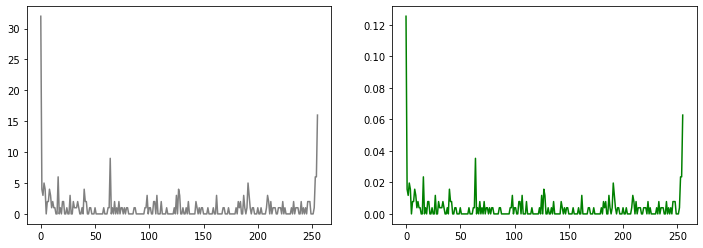

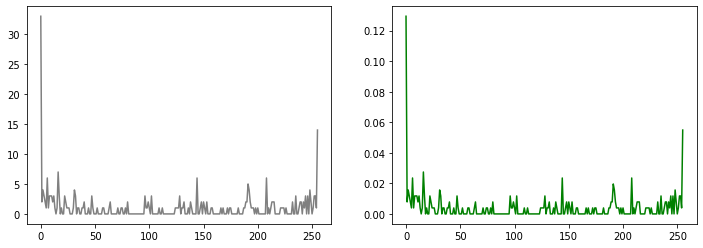

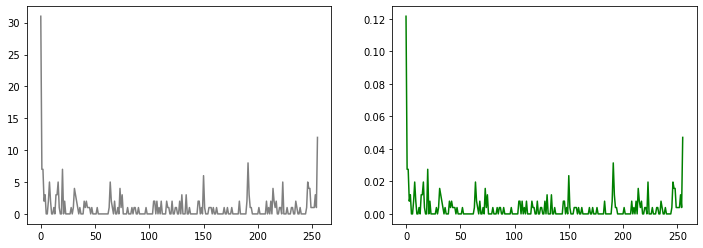

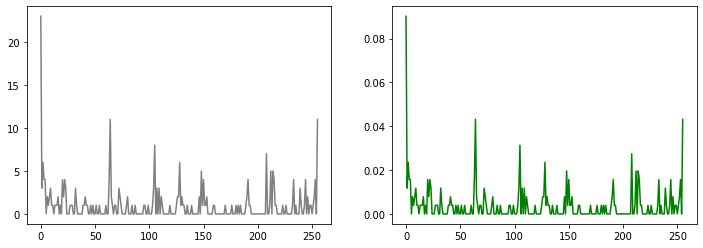

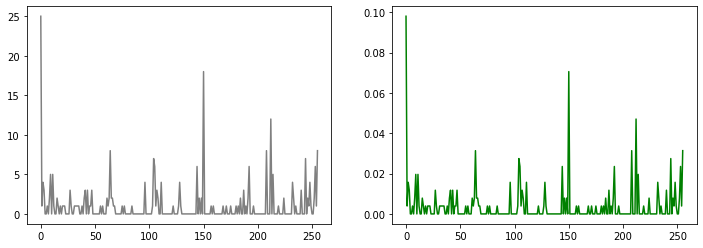

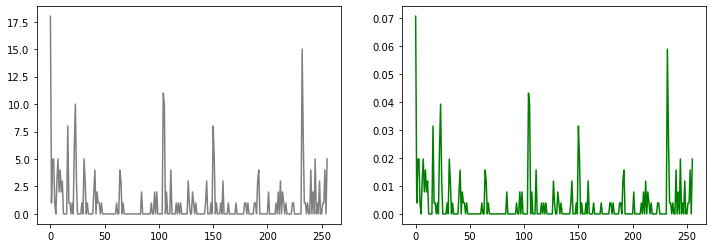

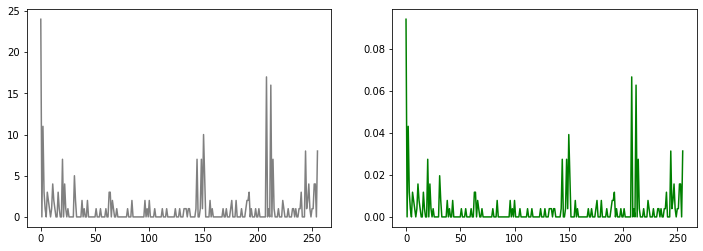

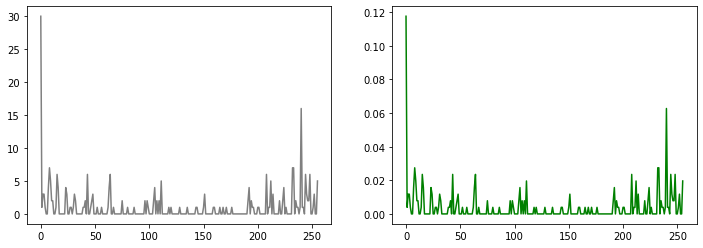

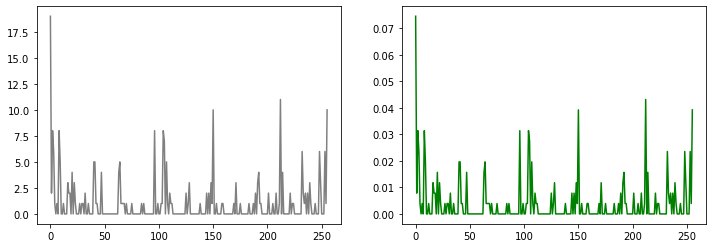

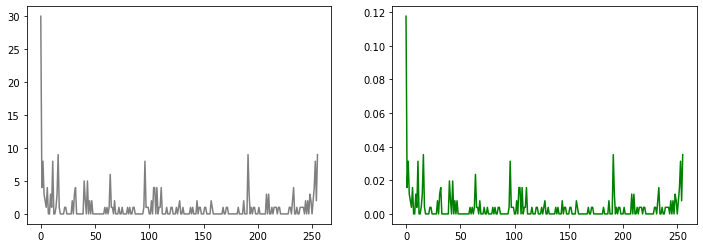

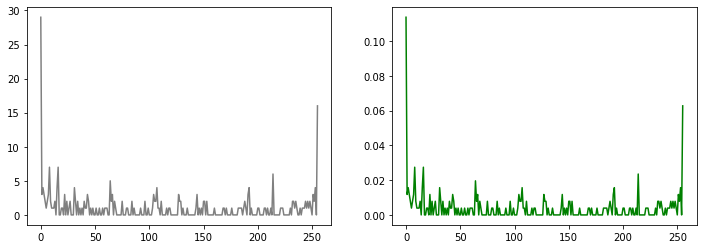

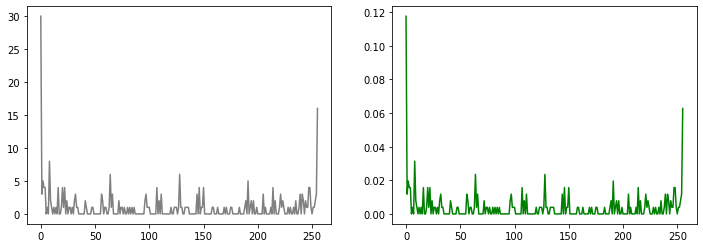

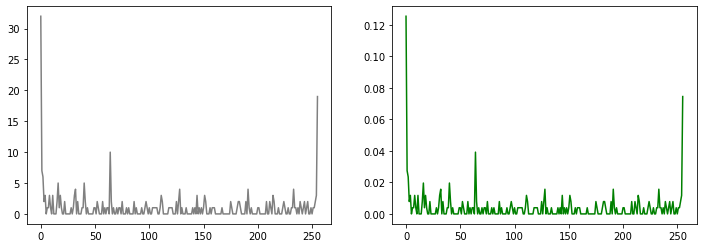

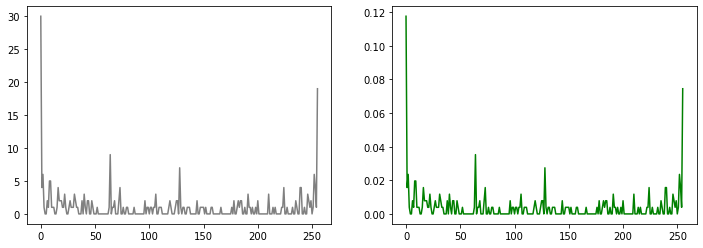

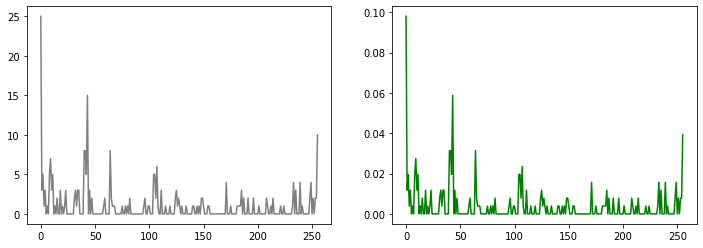

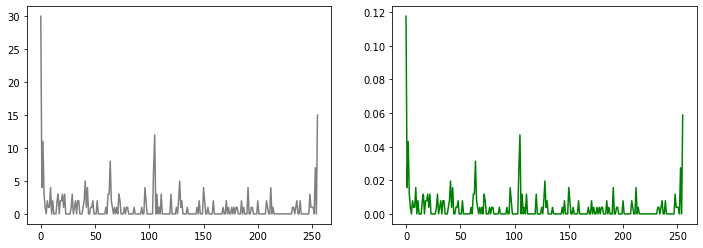

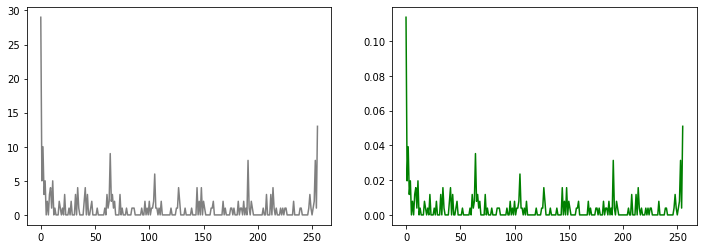

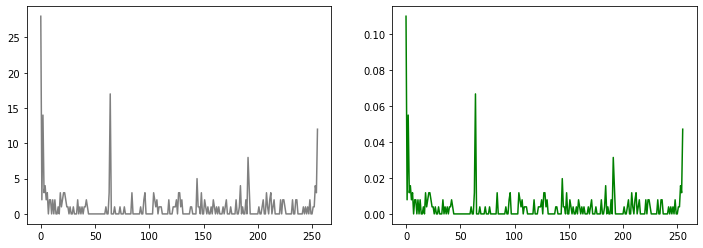

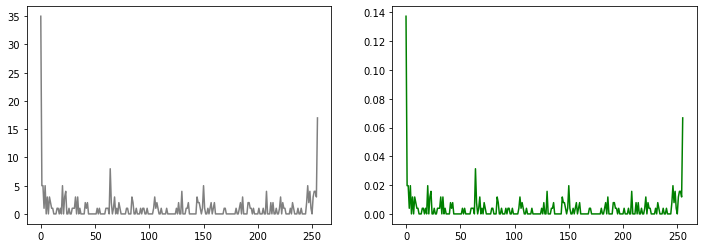

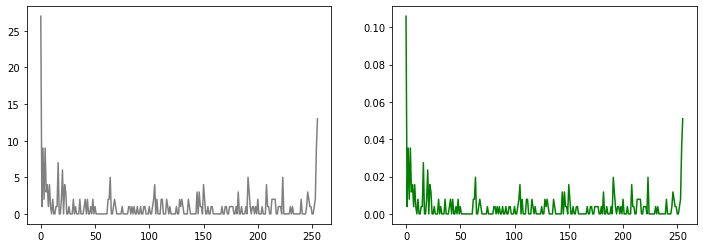

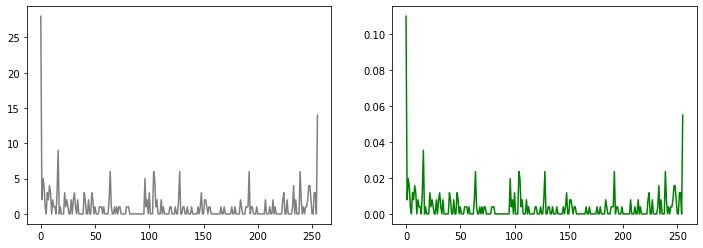

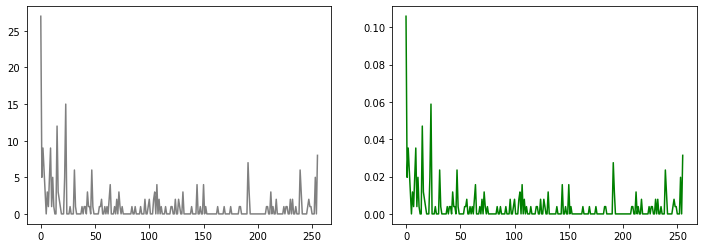

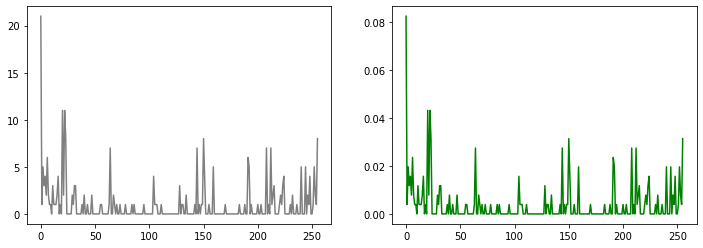

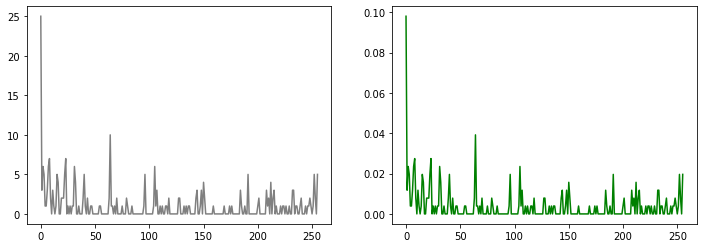

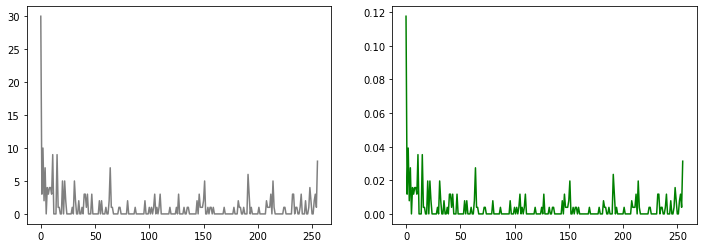

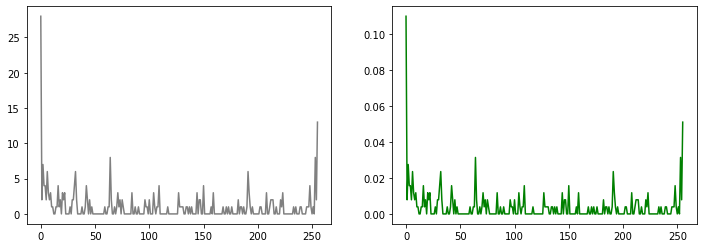

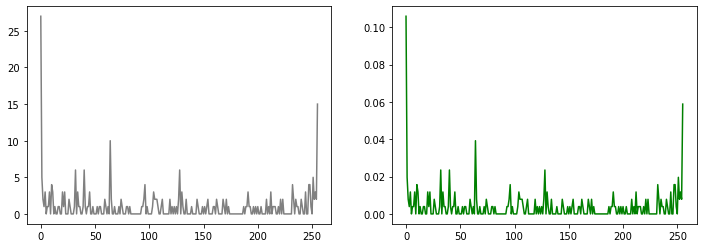

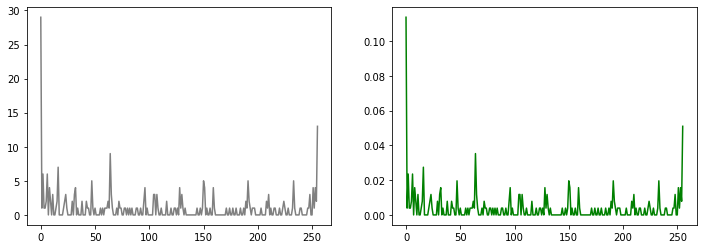

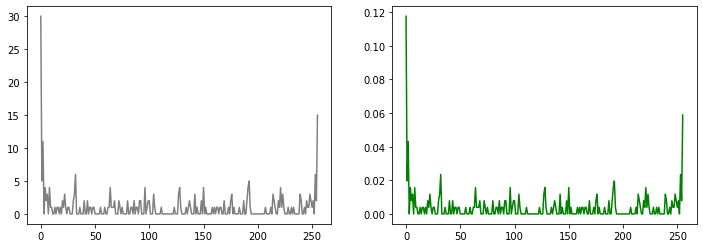

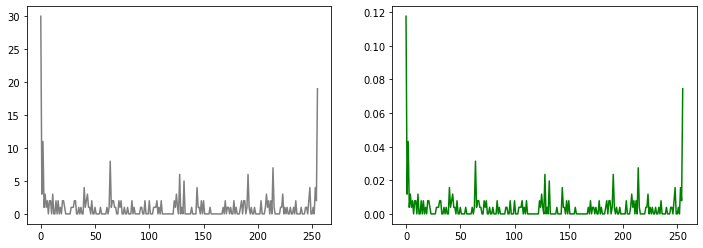

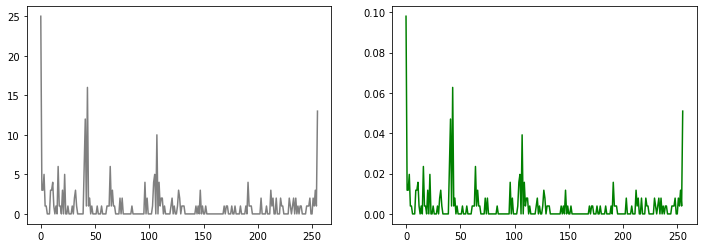

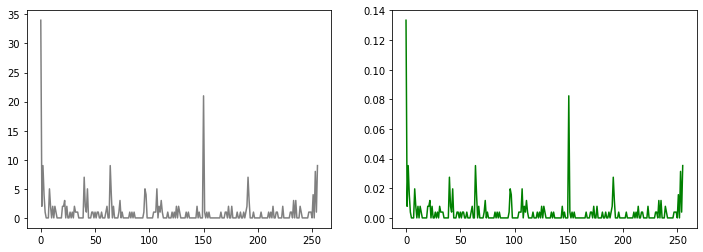

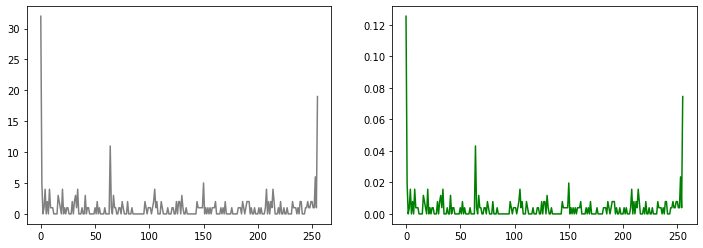

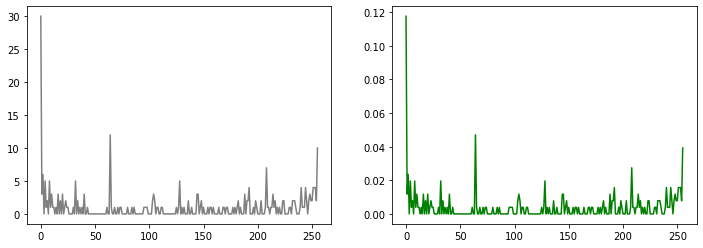

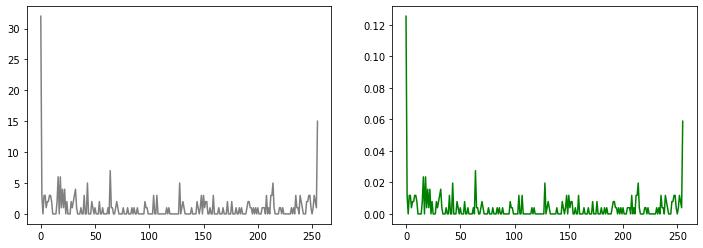

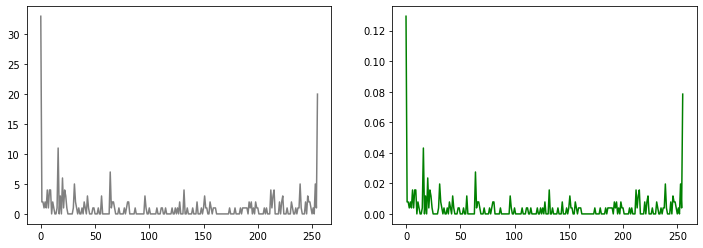

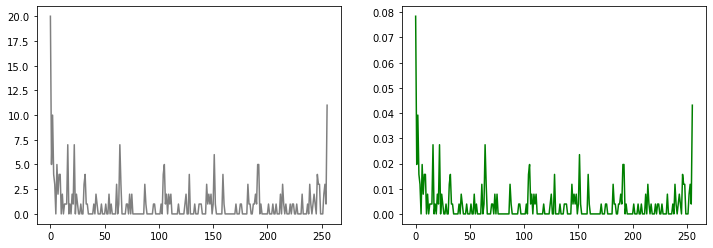

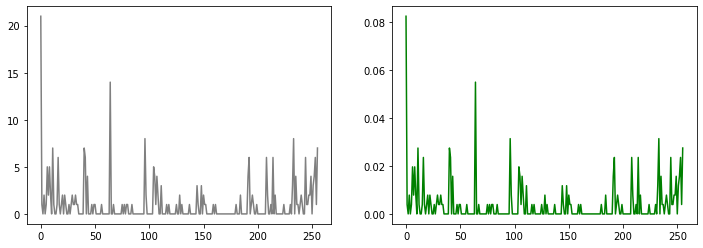

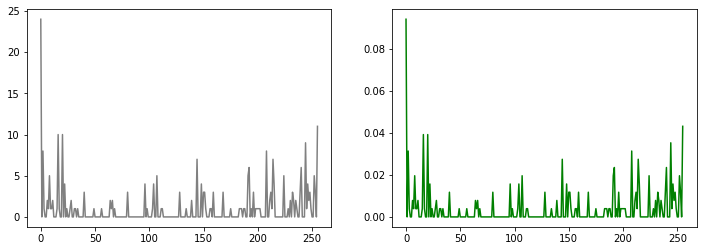

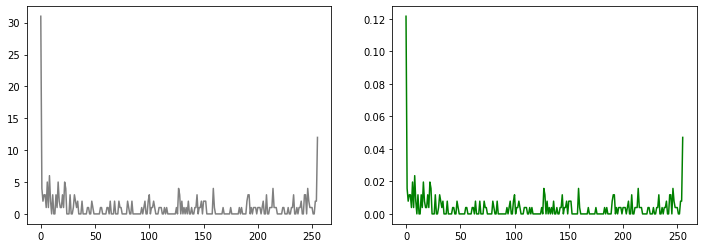

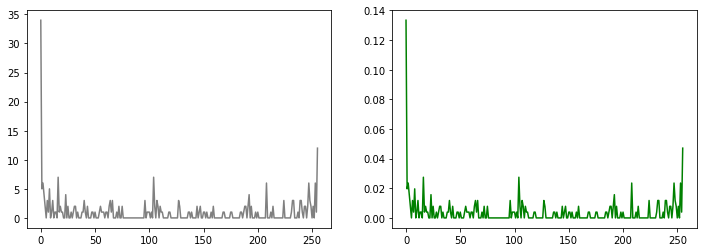

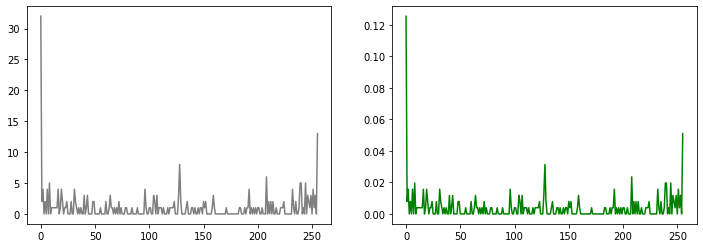

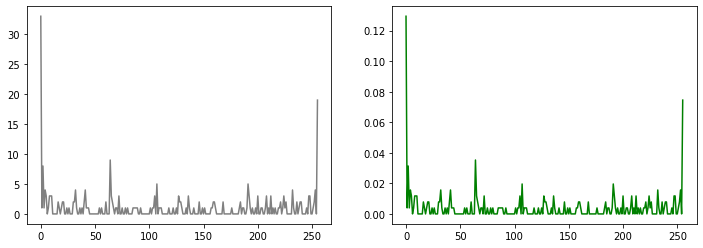

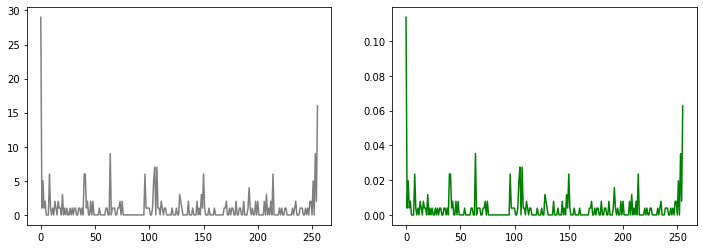

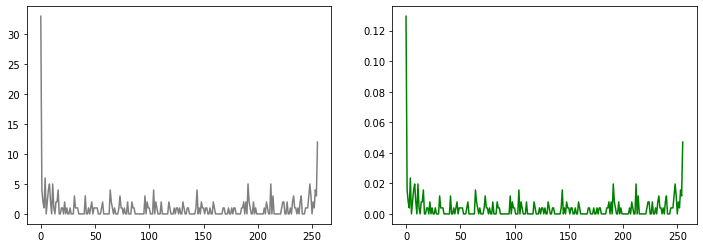

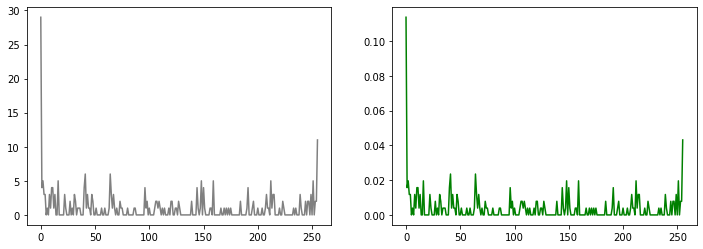

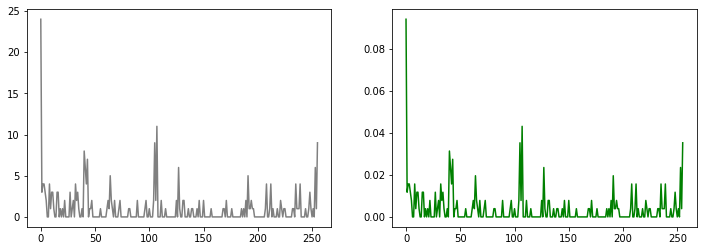

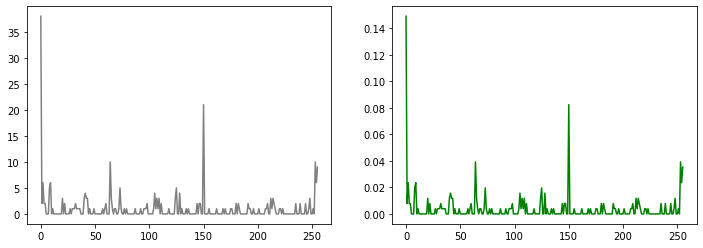

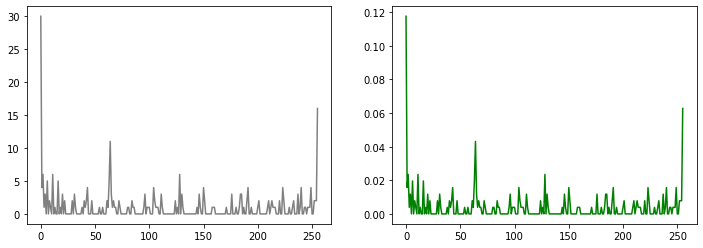

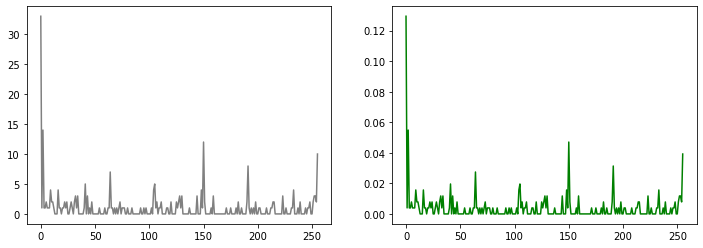

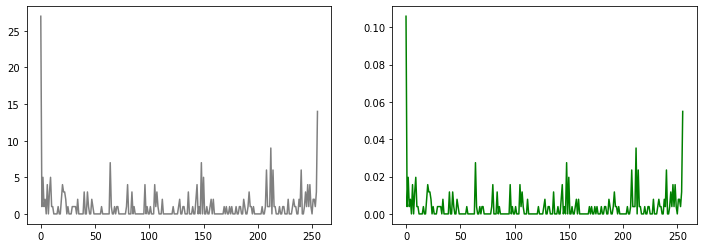

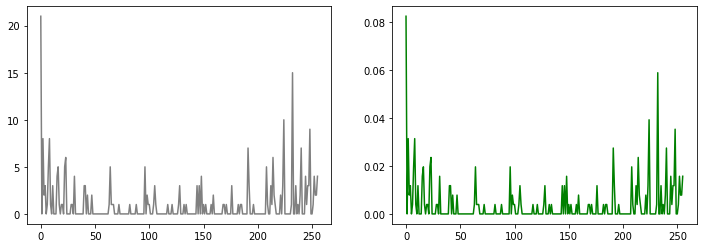

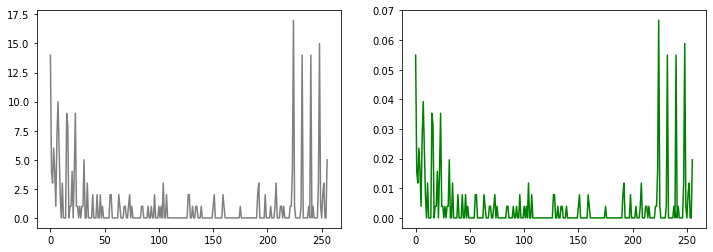

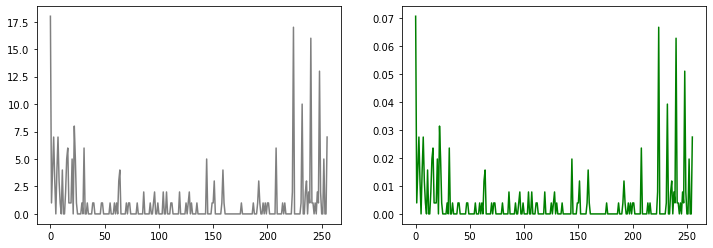

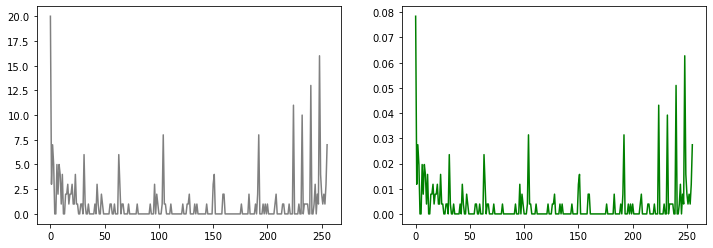

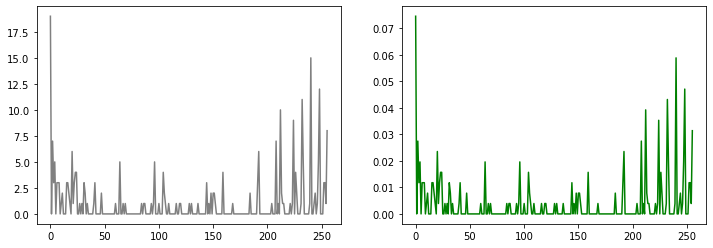

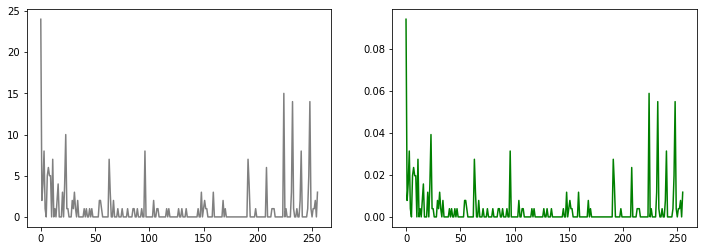

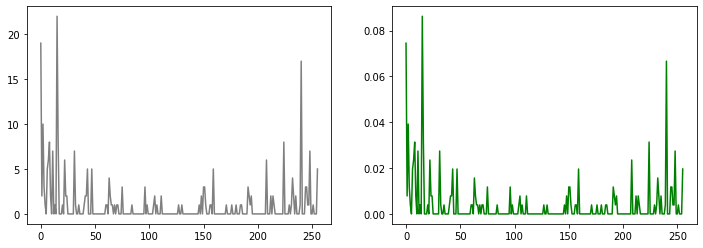

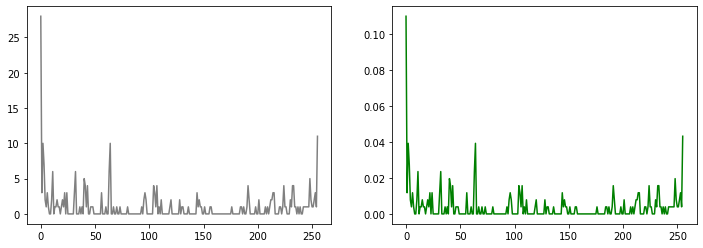

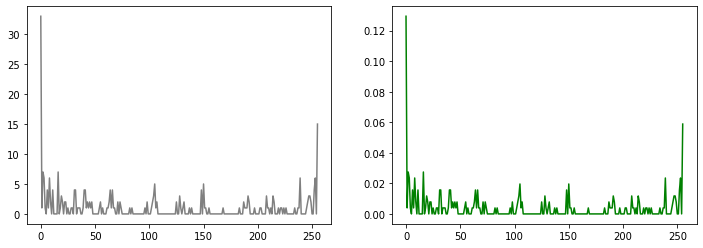

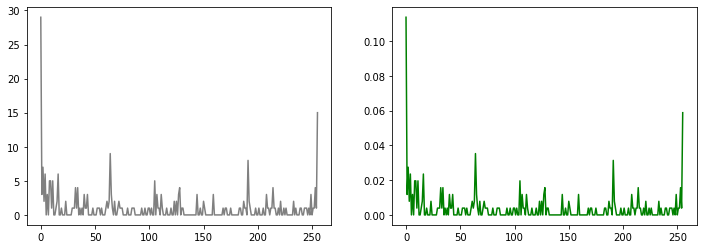

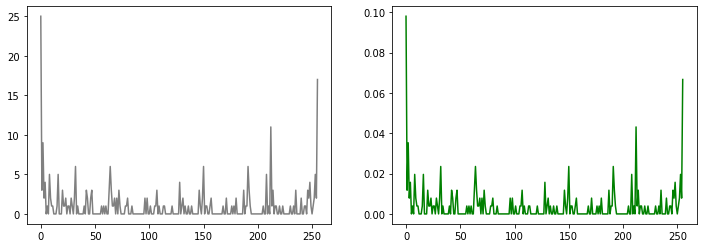

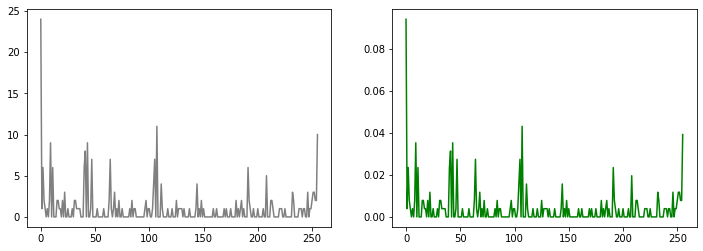

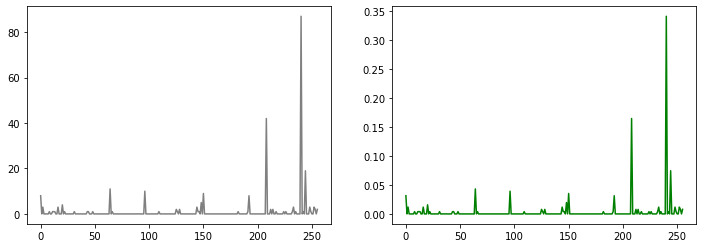

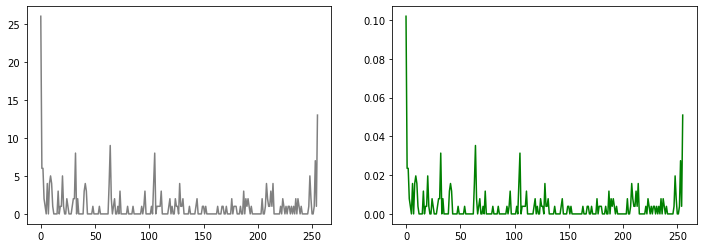

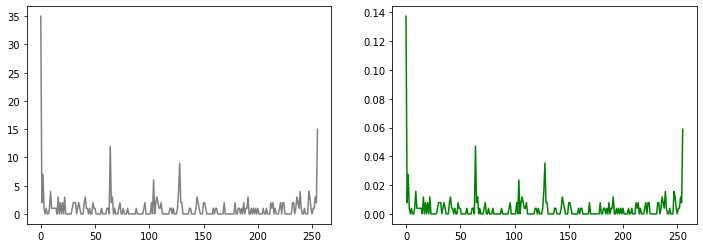

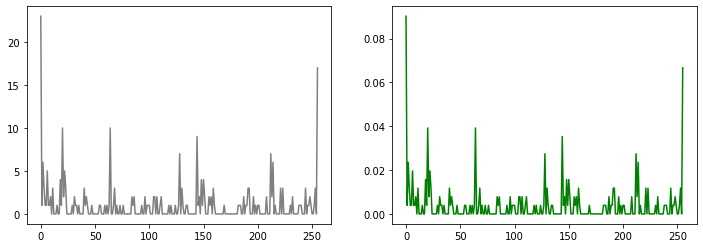

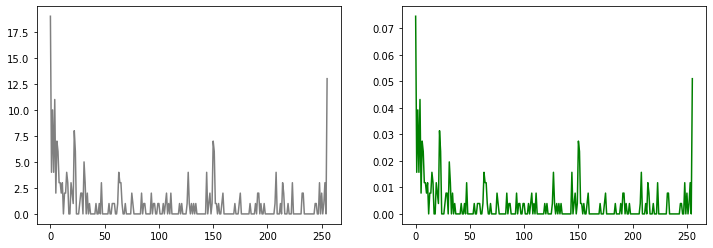

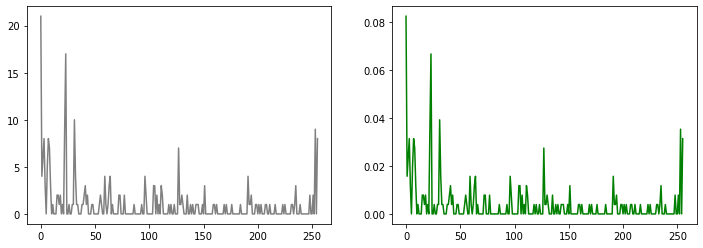

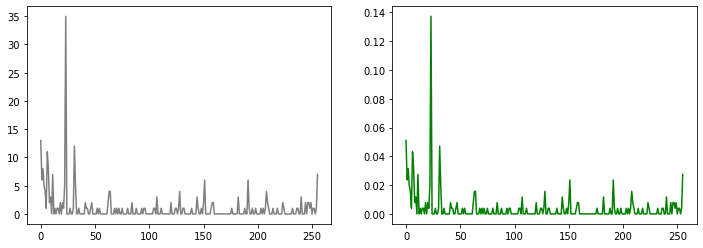

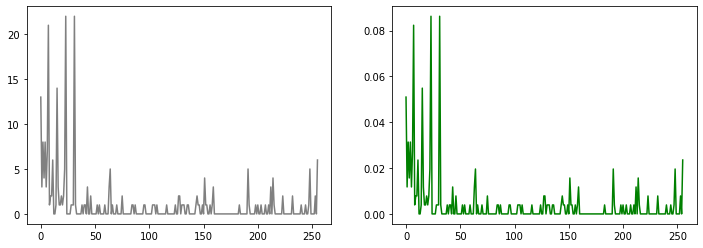

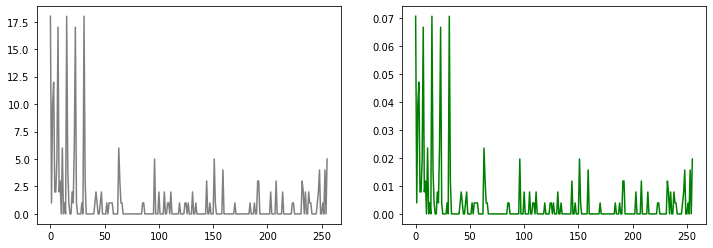

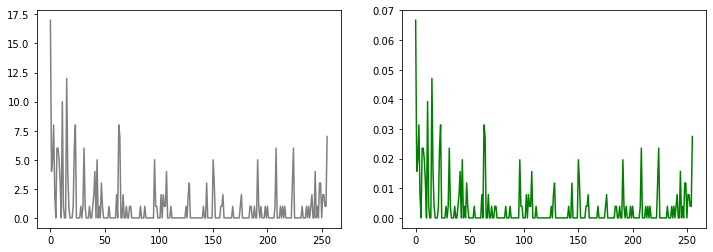

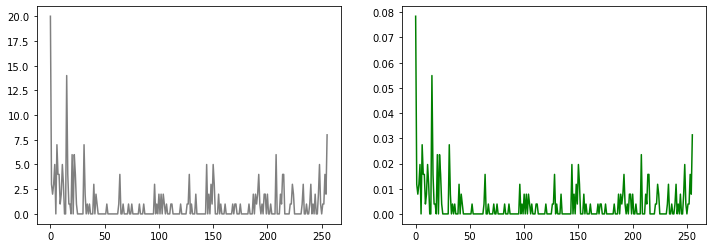

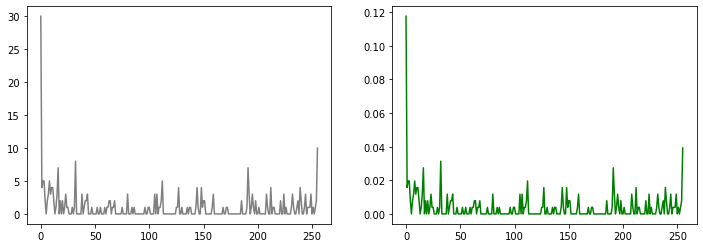

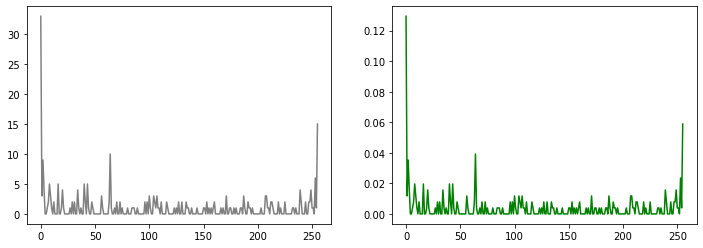

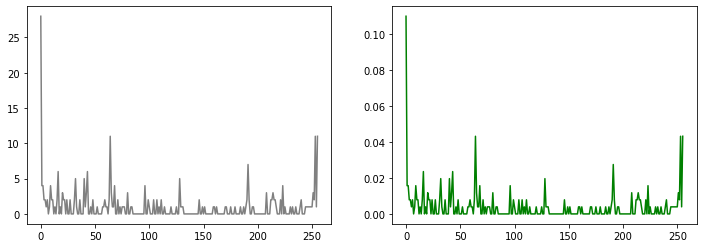

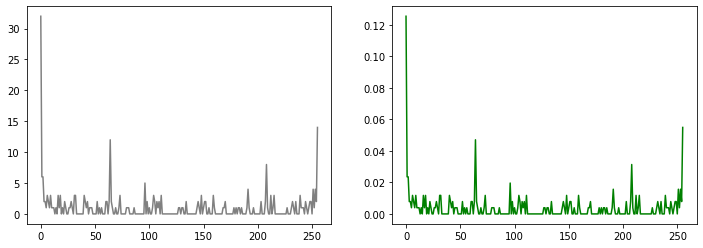

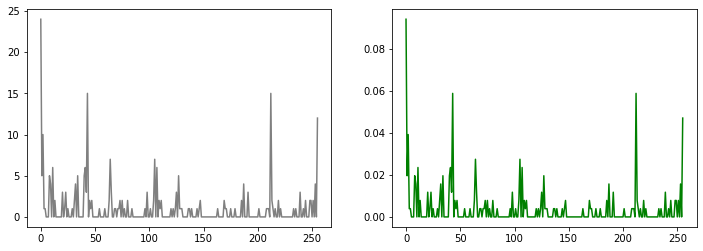

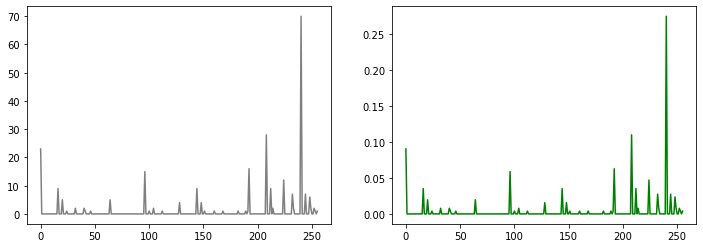

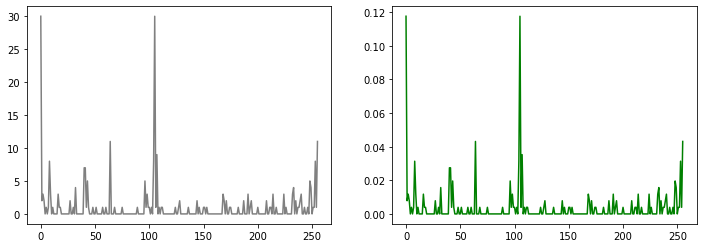

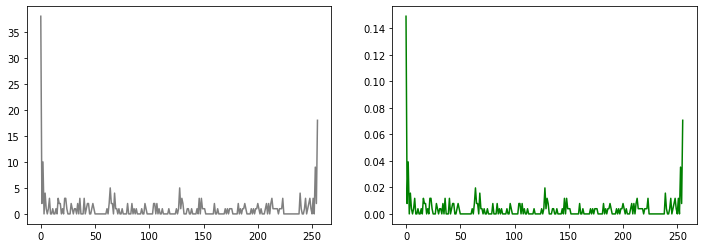

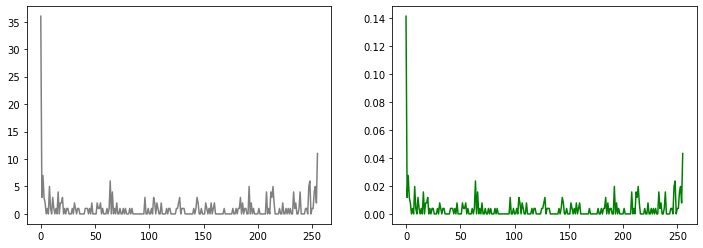

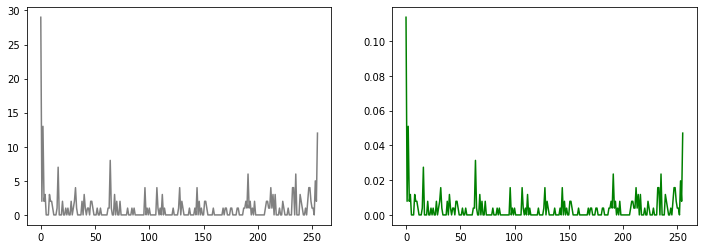

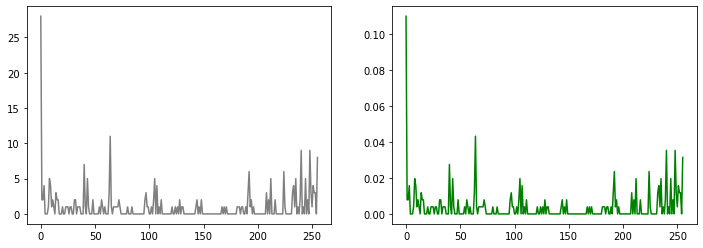

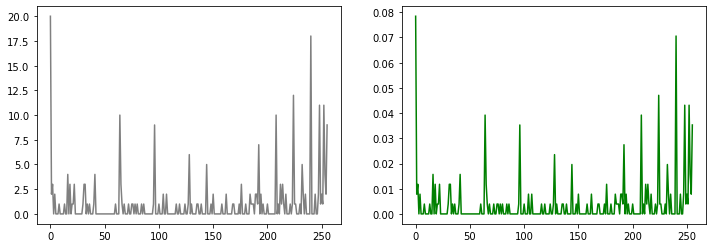

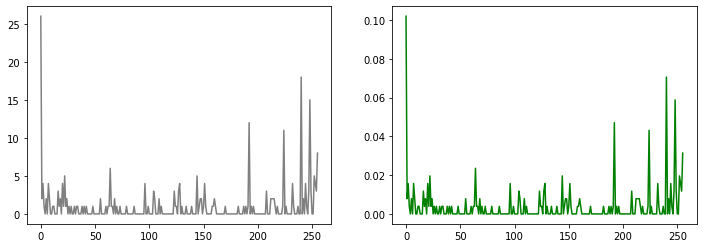

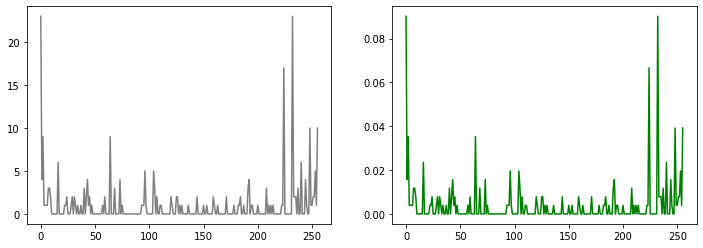

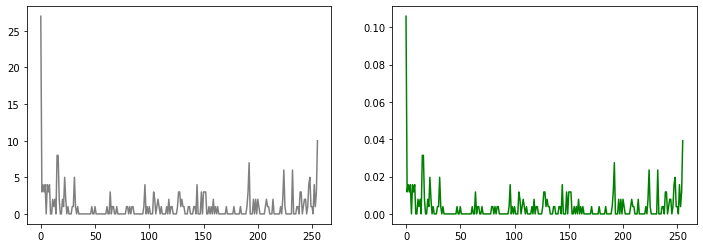

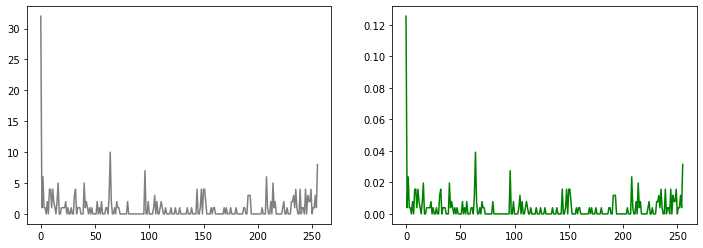

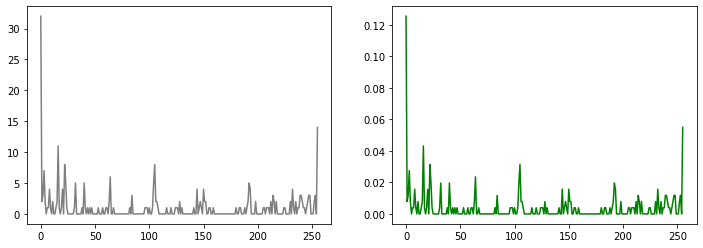

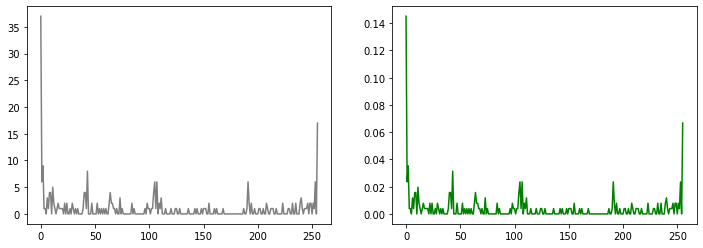

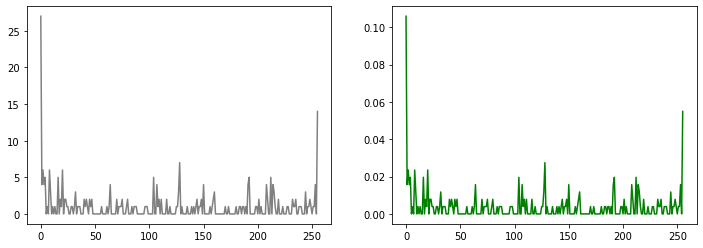

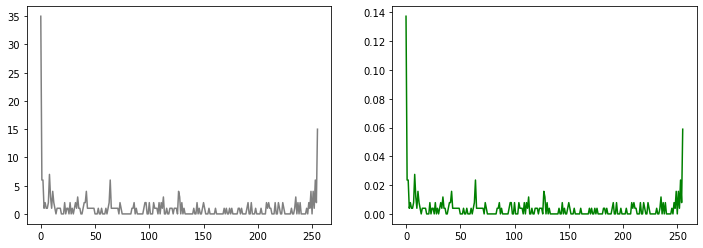

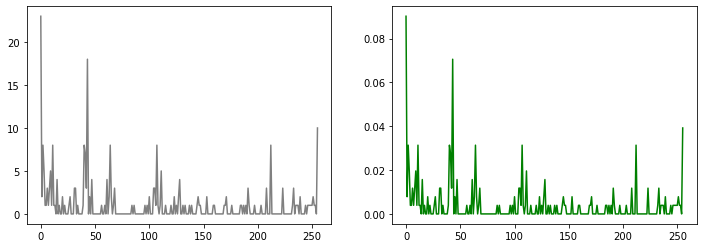

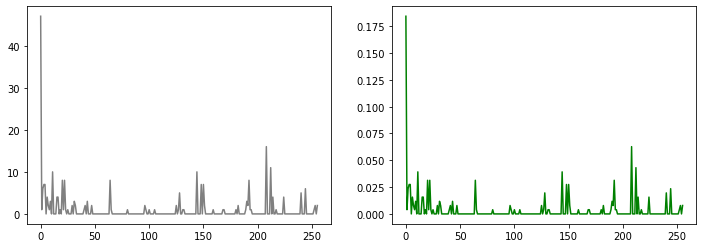

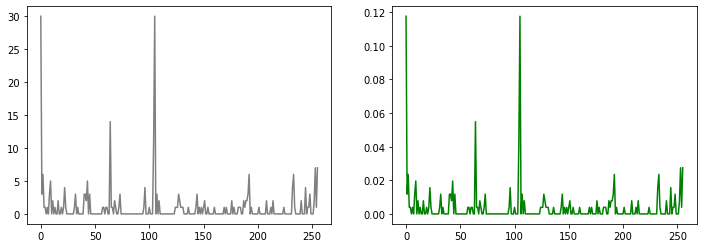

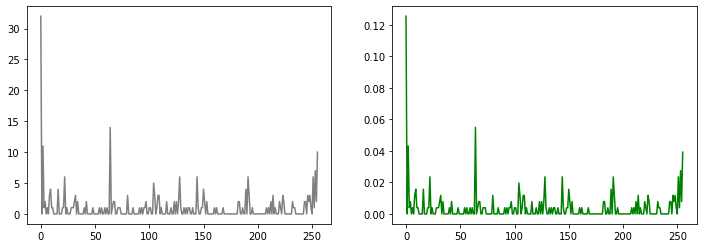

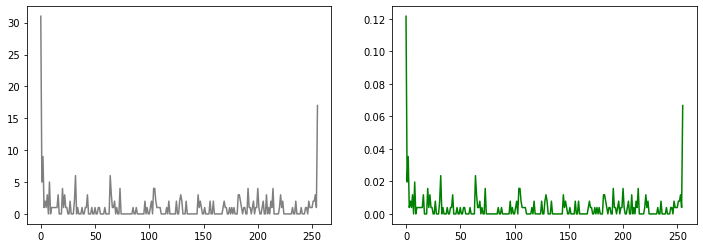

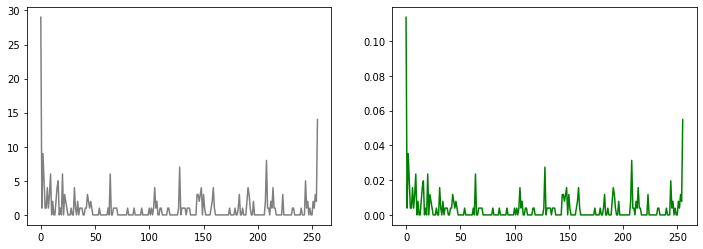

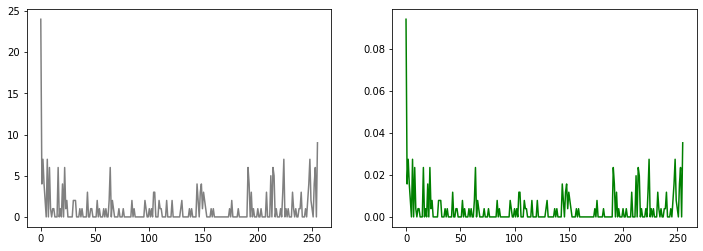

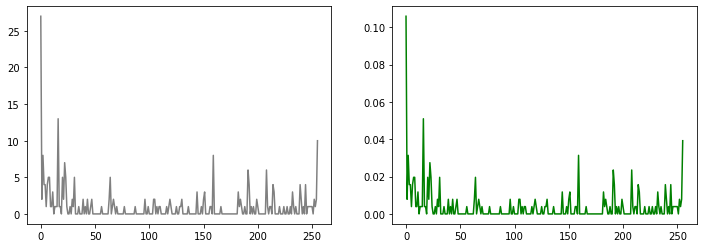

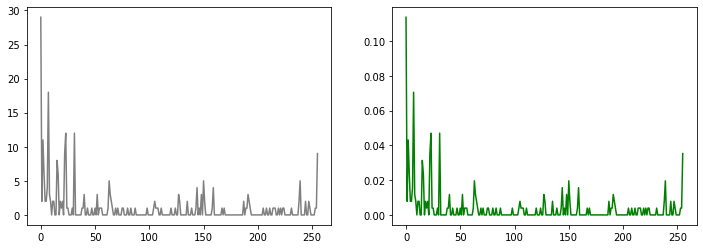

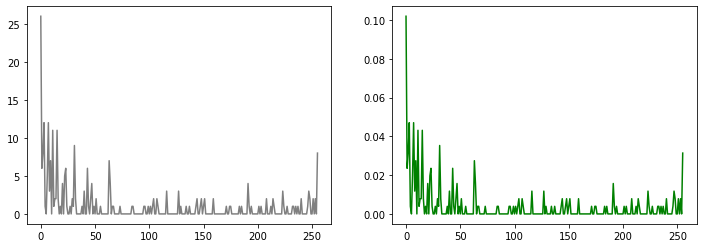

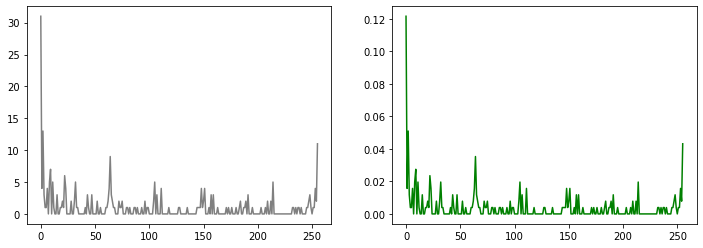

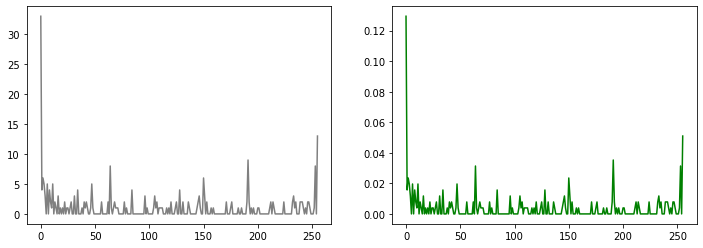

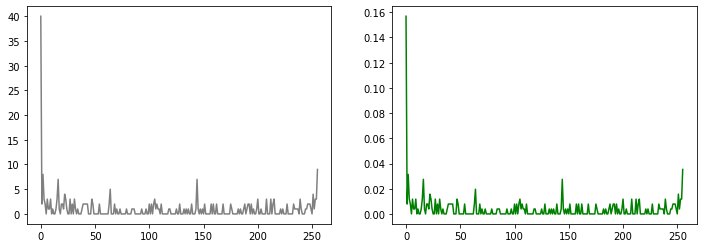

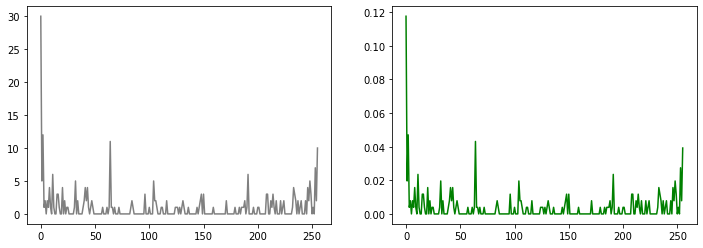

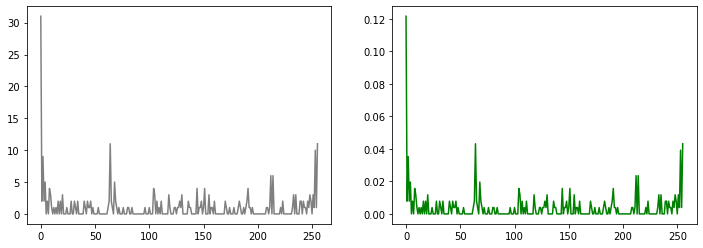

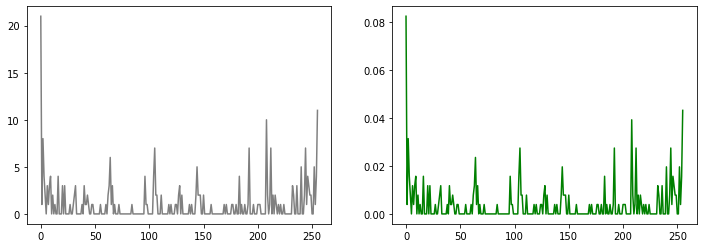

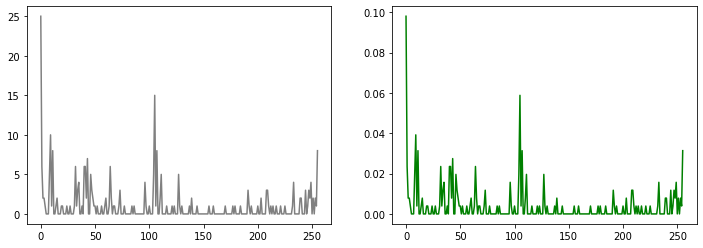

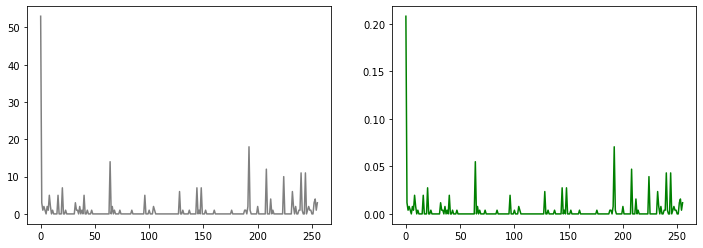

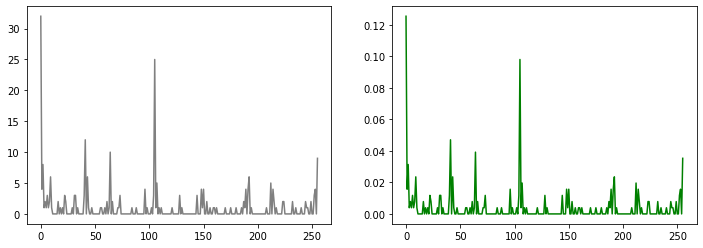

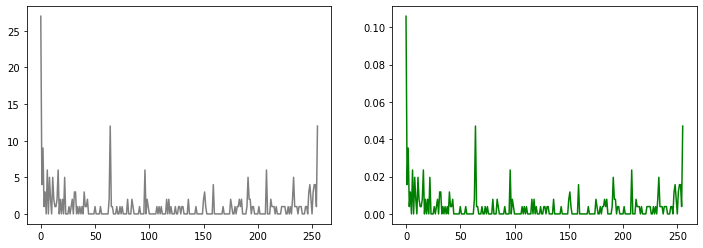

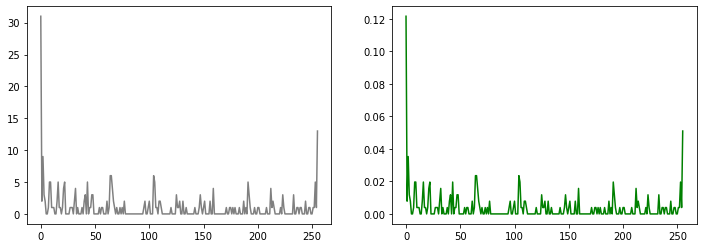

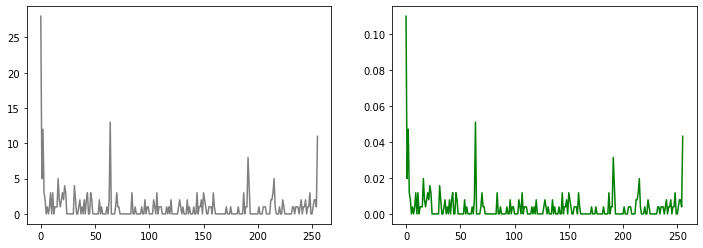

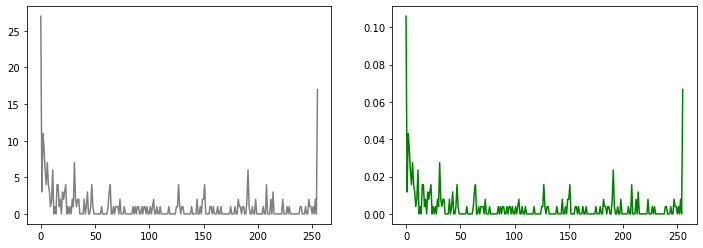

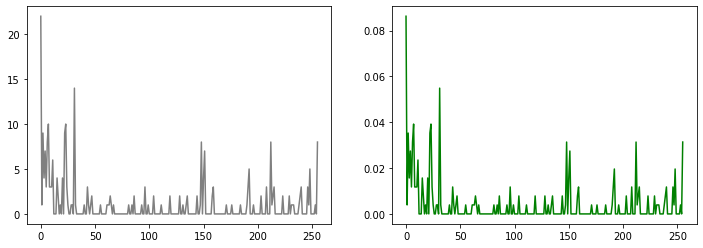

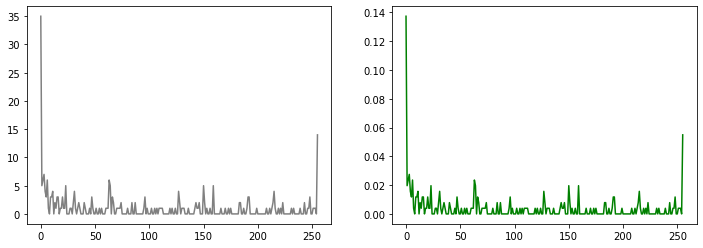

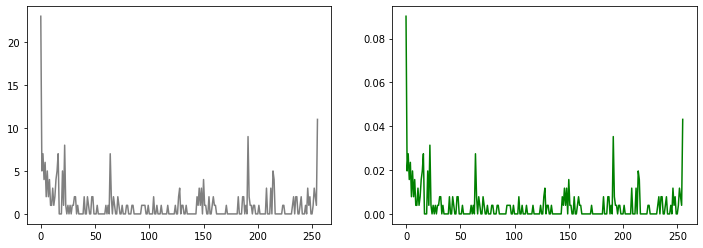

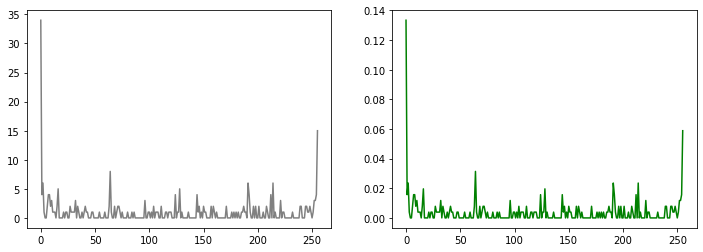

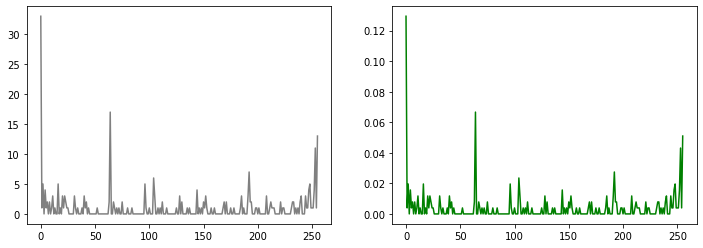

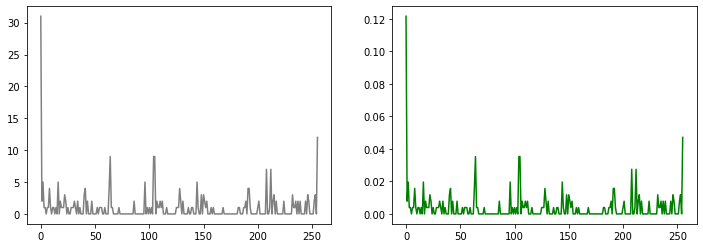

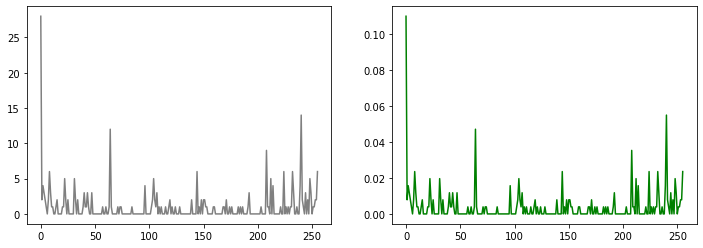

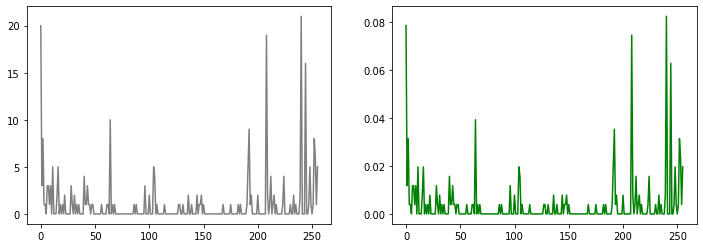

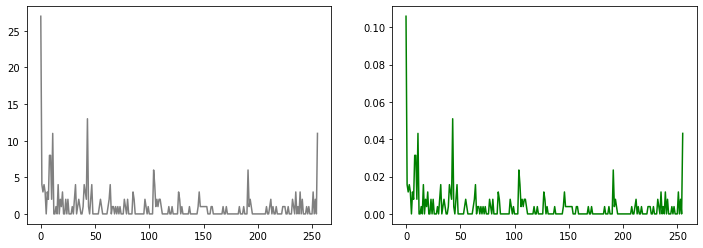

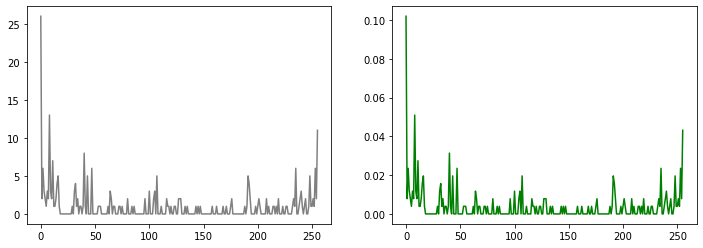

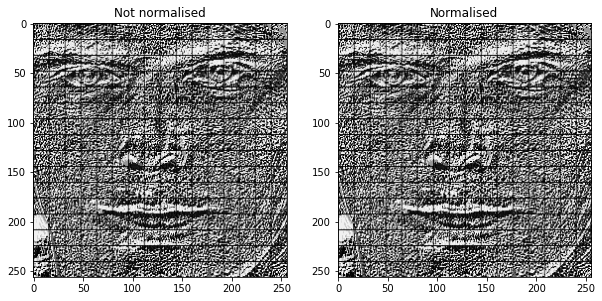

In [59]:
LBP(image,16)
